<a href="https://colab.research.google.com/github/mmb405/Machine-Learning/blob/main/Biete%2C_Michelle_ML_Final_Project__Identifying_Abnormal_Gene_Expression_%26_Potential_Therapeutics_in_Veterans_with_PTSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

The pathophysiology of PTSD has yet to be elucidated as it is a complex psychiatric disorder that has many of the same symptoms as other neurological diseases. In this study, deep learning was used to visualize the dataset, and t-tests were performed to determine if there were differences in gene expression in the group of U.S. Marines that were diagnosed with PTSD prior to and after their deployment compared to those who were also deployed but didn't develop PTSD. From here, the genes were analyzed using NeDRex to identify any drugs that target the genes associated with PTSD in this cohort as a potential therapeutic option. Also, the dataset was filtered for three blood-brain barrier integrity markers (NSE, GFAP, and S100ꞵ) to see if the loss of increased permeability of the blood-brain barrier could have caused PTSD; none of which were found to be significantly different. Interestingly, three of the top features (DSP, GSTM1, ALAS2) that were chosen by the logistic regression classification model for PCA generation had been previously associated with PTSD. KARS was also selected for further research as imatinib could be a possible therapeutic for PTSD patients who overexpression KARS which is currently being used for cancer treatment. Lastly, MBD5 and NOTCH 4 were studied as they are both involved not only in schizophrenia (per the results of this analysis) but also in bipolar disorder. Therefore, further research to determine if they have a common pathway that leads to these psychiatric conditions could be insightful to better understand the pathophysiology of these complex disorders.

#Summary

The pathophysiology of PTSD has yet to be elucidated as it is a complex psychiatric disorder that has many of the same symptoms as other neurological diseases. By studying the gene expression of cohorts prior to and after exposure to combat (traumatic events), differences in gene expression can be determined along genes that made those diagnosed with PTSD after their deployment more susceptible. In this study, deep learning was used to visualize the dataset, and t-tests were performed to determine if there were differences in gene expression in the group of U.S. Marines that were diagnosed with PTSD prior to and after their deployment compared to those who were also deployed but didn't develop PTSD. From here, the genes were analyzed using NeDRex to develop gene networks, diseasomes, and to see if there are any drugs that target the genes associated with PTSD in this cohort as a potential therapeutic option. Also, the dataset was filtered for three blood-brain barrier integrity markers (NSE, GFAP, and S100ꞵ) to see if the loss of increased permeability of the blood-brain barrier could have caused PTSD. After analyzing the data, none of the blood-brain barrier integrity markers were found to be significantly different between the PTSD and PTSD risk samples and their controls. Interestingly, three of the top features (DSP, GSTM1, ALAS2) that were chosen by the logistic regression classification model had been previously associated with PTSD or inflammation, which has been shown to be connected to PTSD. This shows that even though clear groupings based on the conditions weren't shown, the model used genes implicated in PTSD to generate the PCA for data visualization. Furthermore, three genes of interest were selected for further research based on their significant gene differential expression in the PTSD samples versus the controls: KARS, NOTCH4, and MBD5. KARS was selected for further research as there is currently a drug, imatinib, which targets it for cancer treatment as its overexpression has been associated with increased cell migration and invasion. Therefore, it could be a possible drug therapy option for PTSD patients who suffer from neurological disorders due to the upregulation of KARS expression, which is shown in this study by a fold change of greater than 1. Lastly, MBD5 and NOTCH 4 were studied as they are both involved not only in schizophrenia (per the results of this analysis) but also in bipolar disorder. Therefore, further research to determine if they have a common pathway that leads to these psychiatric conditions could be insightful to understanding the pathophysiology of these complex disorders better.

#Introduction & Literature Review

Post-traumatic stress disorder (PTSD) is a psychiatric disease whose pathophysiology is yet to be elucidated (Breen et al., 2015). Traumatic experiences such as violence, natural disasters, and military combat can lead to the development of this condition, with a 20% increase in the prevalence of this PTSD in US military personnel who have been in combat (Bam et al., 2017). Patients with this disorder can experience insomnia, flashbacks, nightmares, irritability, hypervigilance, and heightened startle response (Bam et al., 2017). Those with PTSD may also be at a higher risk for a dysregulated immune system, cardiovascular disease, diabetes, gastrointestinal disease, chronic fatigue syndrome, musculoskeletal disorders, and autoimmune diseases (Bam et al., 2017).
 
One hypothesis toward the cause of PTSD is the impairment of the blood-brain barrier due to an individual's traumatic event, leading to increased exposure to environmental and physiological chemical changes that affect neurological function (Kadry et al., 2020). One study found that S100β, NSE, and GFAP protein levels can be tested using blood samples to determine if the integrity of the blood-brain barrier has been compromised (Kadry et al., 2020). Neuron-specific enolase (NSE), glial fibrillary acidic protein (GFAP), and S100β are currently being studied to identify neuronal damage, however, their presence in blood circulation can also signify openings in the BBB (Kadry et al., 2020). Out of these three proteins, the presence of S100β in the blood seems to correlate the most with BBB integrity versus neuronal damage making it a key protein to study to see if its presence also correlates with PTSD diagnosis (Kadry et al., 2020).
 
By identifying gene expression patterns amongst PTSD patients, molecular biomarkers and therapeutic targets can be identified to improve the effectiveness of treatment. As with many other psychological disorders, the symptoms can not only be mentally and physically detrimental but can also affect a patient's social relationships leading to emotional distress as well. With this said, it is important to note that the patients in the dataset used in this analysis were U.S. Marines that had their blood samples collected one month before deployment and three months post-deployment as the type of trauma that one is exposed to will also affect the gene expression patterns that are observed (Breen et al., 2015; Kuan et al., 2017). None of the patients were diagnosed with PTSD (CAPS25) before deployment, and they were re-evaluated for this disorder (CAPS 25) when they returned using the Clinician-Administered PTSD Scale, which is a structured diagnostic interview that uses the criteria from the Diagnostic and Statistical Manual of Mental Disorders (fourth edition) (Breen et al., 2015). Patients diagnosed with partial or full PTSD showed behaviors that could detrimentally affect life and physical integrity or cause injury (Breen et al., 2015). These PTSD patients also had at least one re-experiencing and three avoidance or two hyperarousal symptoms or two avoidance and two hyperarousal symptoms that occurred at least once within the last month and caused moderate distress (Breen et al., 2015). In order to establish a control group, those who didn't develop PTSD but had the same combat, age, and ethnicity were used to identify any difference in gene expression pre- and post-deployment with those who were diagnosed with PTSD (Breen et al., 2015). This dataset was adapted from Breen et al., for this analysis and was well balanced, with half of the subjects developing PTSD and the other half not being diagnosed with this condition(2015). Each participant also had gene expression available for both time points prior to and following their deployment to a conflict zone, therefore, no data points were missing (Breen et al., 2015). These samples then underwent high throughput RNA-sequencing using the Illumina HiSeq 2000 (Breen et al., 2015). Due to the unique combat exposure that military personnel are exposed to as an occupational hazard, it is important to identify possible genes involved in their development of PTSD to improve and possibly re-purpose drug treatment options to treat their condition.


#Methods: Analysis Structure

Dataset:
This dataset consisted of 94 U.S. Marines who gave peripheral blood samples 1-month prior to their deployment to a combat zone and 3-months post-deployment (Breen et al., 2015). During these two time points, they were also assessed for PTSD; none were diagnosed with PTSD prior to deployment (Breen et al., 2015). After deployment, 47 marines were diagnosed with PTSD (Breen et al., 2015). The other 47 Marines were used to control combat exposure, age, and ethnicity (Breen et al., 2015). The blood samples underwent high throughput RNA-sequencing using the Illumina HiSeq 2000 (Breen et al., 2015). The four classification groups used for this dataset were grouped as follows: "Pre-Control" was the label used to describe the RNA-sequencing results of the blood samples collected 1-month prior to deployment in individuals that weren't diagnosed with PTSD post-deployment, "PTSD Risk" was used to label the results blood samples collected 1-month prior to deployment in individuals that were diagnosed with PTSD post-deployment, "Post-Control" was used to label the results of the blood samples collected 3-months post-deployment in individuals that didn't develop PTSD, and "PTSD" was used to label the results of the blood samples collected 3-months post-deployment in individuals that developed PTSD (Breen et al., 2015). The raw dataset used in this analysis can be found in the Geo Database in Series GSE64813. In order to annotate this dataset, the condition 'PTSD', 'PTSD Risk', 'Pre-Control', and 'Post-Control' were added for each sample and used this dataset in the analysis, which can be can be found on Harvard Dataverse using the following link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FP8ZOMR&version=DRAFT
 
Exploratory Analysis:
A PCA was generated prior to classification and feature selection. T-tests were also run to determine if there was a significant difference (p-value < 0.05 and FC> 1) in gene expression between the "Pre-Control" vs. "PTSD Risk" and the "PTSD" vs. "Post-Control." The genes filtered from this analysis were then used to compare these two groups to see if there were any significant differences in gene expression in the risk and PTSD-diagnosed individuals compared to their controls.
 
Data Classification & Dimensionality Reduction:
LazyPredict was used to choose an optimal classification model to determine the features that were significant. First, I ran Lazy Predict to choose the optimal classification mode to determine which features are most significant in accurately classifying the samples into groups. Autoencoders were then used to reduce the dimensionality of the dataset to provide a PCA with more variance explained.  
 
Gene Differentiation & Drug Repurposing:
T-tests were run for the entire dataset to compare the PTSD risk and the PTSD samples to their respective controls. Genes were considered significant if they had a p-value<0.05 and a fold change greater than 1. The top 10 genes with the lowest p-value and greatest fold change were then identified to see what diseases they were associated with and if there is a current drug that is being used to target the gene using NeDRex and Cytoscape (Sadegh et al., 2022; Shannon et al., 2003).


#Results

The exploratory analysis PCA showed that there were no clearn groupings amongth the PTSD- risk control group, pre-deployment group (pre-control), the PTSD group, and the post-deployment (post-control) group as shown in Figure 1. Due to the unclear groupings in this original PCA to better visualize the dataset autoencoders were used to reduce the dimensionality of the dataset using 60% of the dataset and testing the model created using the remaining 40% of the data (FIgure 2). Overall, the use of deep learning for data visualization showed an increased explained variance of 55.46% compared to the traditional PCA as shown in the Figure 1. However, there still aren't clear distinct groupsings amongst the different conditions. Lazy Predict was then used to determine the optimal classification model for the dataset which was logistic regression and the top three features that most significantly impacted the proper classification of the samples were DSP, GSTM1, and ALA52 (Figure 4). The top 10 genes that had different genes expressions in the PTSD risk compared to the pre-deployment group were RNFT1, DARS, CMPK2, IFI44L, IFI16, IFIH1, DDX58, IFI44, HERC5, RSAD2, LILRA4, MS4A4A, NOTCH, CLECL12B, SIGLEC1, C2, and TMEM45B (Table 1 & 2 ). As shown in figure 5, NOTCH4 is the only gene associated with a mental health disorder of bipolar disorder according to the NeDRex database in Figure 5 (Sadegh et al., 2022). NOTCH4 is also differentially expressed in the PTSD versus the post-deployment group along with MBD5, SLC35B3, NCKAP1L, C2orf49, IFIT5, IFI44L, NAGK, TMEM45B, GPR65, LILRA4, MS4A4A, CLEC12B, RSAD2, SIGLEC1, and C2 (Table 3 & 4). The interaction between NOTCH4 and MBD5 is especially intersting as the diseasome in Figure 7 shows that both genes are involved in bipolar disorder and MBD5 is also associated with intellectual disability (Sadegh et al., 2022; Shannon et al., 2003). Using the drug prioritization function in NeDRex it was found that out of all of the genes found to be significantly differentially expressed in the PTSD and PTSD-risk versus the controls groups only KARS1 has a drug that directly regulates it called Imatinib (Figure 6) (Sadegh et al., 2022; Shannon et al., 2003). The other drugs (blue) that are associated with the genes (yellow) in Figure 6 target geens that's expression can then affect one of th top genes that were differentially expressed in the PTSD-risk versus pre-deployment control groups (Sadegh et al., 2022; Shannon et al., 2003). As shown in Figure 8 there aren't any drugs that target NOTCH4 or MBD5 which was associated with bipolar disorder in the PTSD-risk and PTSD groups (Sadegh et al., 2022; Shannon et al., 2003). Also, the three blood brain barrier biomarkers NSE, GFAP, and S100ꞵ that found in a previous study to be significantly different in PTSD versus non-PTSD patients were not found to be significant in this study. 

#Analysis

##Exploratory Analysis: PCA

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load datasets
df_all = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1) (1).xlsx') 

In [ ]:
labels_list = df_all.loc[[0]] 

#Make a list of sample names
sample_names = df_all.loc[0] 
sample_names = list(df_all)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Condition')) 

#Remove row "Group" at index 0 from data
data_all = df_all.drop([0]) 


#Remove id from axis
data_all = data_all.drop(['GeneSymbols'], axis=1) 
data_all = data_all.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

labels

array(['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control'], dtype=object)

In [ ]:
df_all.head()

,GeneSymbols,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,...,Sample_90_1,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3
0,Condition,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,...,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control
1,A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.71598,1.495542,2.570589,...,2.391051,2.375044,1.725939,2.429608,1.419594,1.709946,2.23226,2.531731,2.501152,2.42359
2,AAAS,4.335821,4.30393,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,...,4.64968,4.598025,4.335874,4.60505,4.414963,4.606384,4.417615,4.542344,4.26956,4.369076
3,AACS,3.308096,2.80474,3.171439,3.038533,3.150784,3.04664,2.890478,3.149423,3.080179,...,3.038,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049
4,AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,...,5.002741,4.811053,5.01872,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896


In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler 

scaled = StandardScaler() 
scaled.fit(data_all) 
scaled_data_all = scaled.transform(data_all) 


Text(0, 0.5, 'cumulative explained variance')

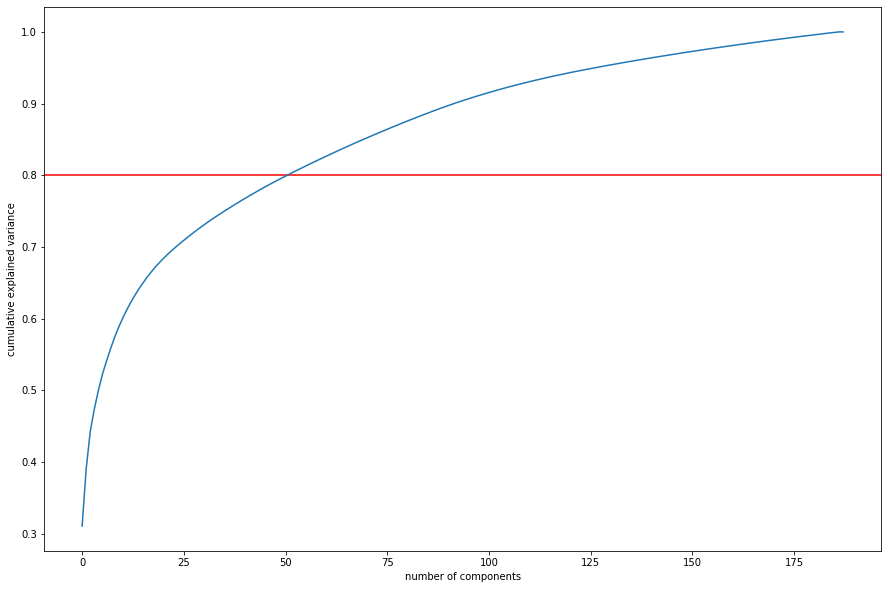

In [ ]:
#Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca_all = PCA().fit(scaled_data_all)

#plot
plt.figure(figsize=(15, 10))
plt.axhline(y = 0.8, color = 'r', linestyle = '-')
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

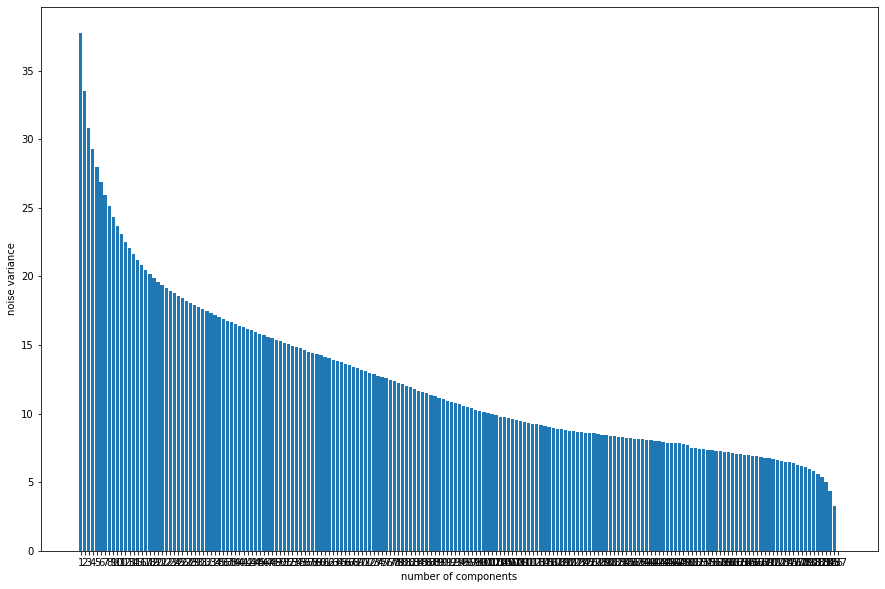

In [ ]:
df1 = pd.DataFrame()

#create a dataframe with noise and number of components
for i in range (1,pca_all.n_components_):
  pca_all = PCA(n_components=i) 
  pca_all.fit(scaled_data_all)
  df1 = df1.append({'comps':i,'noise': pca_all.noise_variance_}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df1.comps, df1.noise)
plt.xlabel('number of components')
plt.ylabel('noise variance')
plt.xticks(np.arange(min(df1.comps), max(df1.comps)+1, 1.0));

In [ ]:
pca_all

PCA(n_components=187)

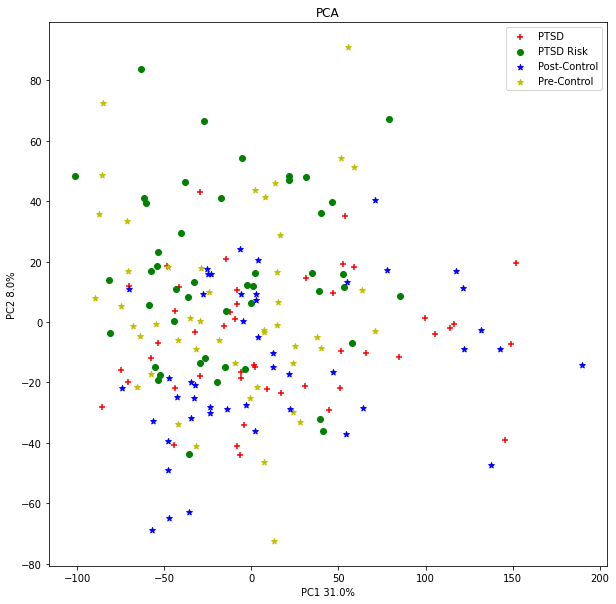

In [ ]:
#Run Principal Component Analysis- Scaled Data
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data_all) 
xpca = pca.transform(scaled_data_all)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'PTSD': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'PTSD Risk': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Post-Control': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Pre-Control': 
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='y', marker='*') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('PCA')
plt.show() 


##Exploratory Analysis: Heat Map- PTSD vs. Post-Control 
Used in presentation
Post Deployment Samples: PTSD Diagnosed Patient RNA-Seq (PTSD) vs. Control RNA-Seq (Post-Control) FC>1

In [ ]:
#import pandas
import pandas as pd
import numpy as np
import scipy as scipy
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load datasets
df_all = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1) (1).xlsx', header=[0,1]) 

In [ ]:
#get the index rows populated with Gene IDs
geneID = df_all.GeneSymbols.iloc[:,0:] 
df_all['ID'] = geneID
df_all.index = df_all.ID
df_all = df_all.drop(columns = ['GeneSymbols'])

#check data
df_all

,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3,ID
,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590,A1BG
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076,AAAS
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049,AACS
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896,AAGAB
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635,AAK1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,3.299457,2.935985,3.535682,3.529615,3.177337,3.316616,3.156552,3.071654,2.467496,2.974959,...,3.379160,3.186619,2.803191,2.773231,2.950600,3.352740,3.224188,2.754645,2.798380,ZXDA
ZXDB,3.523705,3.472628,4.080087,3.906226,3.749084,3.913074,3.935425,3.613054,3.815146,3.703915,...,4.008641,3.600408,3.581256,3.696434,3.839491,3.639130,3.673654,3.629736,3.487720,ZXDB


In [ ]:
#name your multi index column names
df_all.columns.names = ['Sample', 'Type']
df_all.head()

Sample,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3,ID
Type,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590,A1BG
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076,AAAS
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049,AACS
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896,AAGAB
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635,AAK1


In [ ]:
#get samples that are PTSD or PTSD Risk:
df_ptsd1 = df_ptsd = df_all.iloc[:, (df_all.columns.get_level_values(1)=='PTSD') | (df_all.columns.get_level_values(1)=='Post-Control')]
df_ptsd1.head()

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_85_3,Sample_86_3,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.611203,2.490282,1.863901,1.495542,1.718896,1.512798,2.199069,1.947891,1.297105,1.862869,...,1.973411,1.902471,1.227955,2.418189,1.405167,2.375044,2.429608,1.709946,2.531731,2.423590
AAAS,4.303930,4.484835,4.397046,4.248958,4.249182,4.260032,4.680790,4.499020,4.159379,4.323272,...,4.524635,4.326429,4.088381,4.523500,4.468812,4.598025,4.605050,4.606384,4.542344,4.369076
AACS,2.804740,3.038533,3.046640,3.149423,3.319669,3.265439,3.154550,3.071431,2.472955,2.920480,...,2.936075,2.829050,2.797064,3.433078,3.149550,3.138152,2.978592,3.294908,3.130827,2.871049
AAGAB,5.121663,4.973896,4.916886,5.070544,4.870154,5.080482,5.116020,4.880664,5.019301,5.044619,...,4.915668,5.253832,4.571013,4.947206,5.040071,4.811053,4.945425,4.914174,4.938756,4.894896
AAK1,6.041117,6.308471,6.621906,6.009867,6.279308,6.046864,6.511801,6.323736,6.101276,5.828397,...,5.976698,6.108050,5.949166,6.081312,6.090078,6.153252,6.062908,6.531344,6.511424,5.922635


In [ ]:
# perform T-test and FC calculation for all rows PTSD vs Post-Control

# create a new dataframe with PTSD and PTSD Risk columns only (lelve = Type)
Results_df1 = df_ptsd1

#get p-value results
PTSD_pval = scipy.stats.ttest_ind(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD'],
                                     df_all.iloc[:, df_all.columns.get_level_values(1)=='Post-Control'],
                                     equal_var = True, axis = 1).pvalue

#calculate FC by dividing mean
PTSD_fc = np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD'].T)/np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='Post-Control'].T)

#add results to dataframe
Results_df1['p-value'] = PTSD_pval
Results_df1['FC'] = PTSD_fc

#check result
Results_df1

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.611203,2.490282,1.863901,1.495542,1.718896,1.512798,2.199069,1.947891,1.297105,1.862869,...,1.227955,2.418189,1.405167,2.375044,2.429608,1.709946,2.531731,2.423590,0.383714,0.959119
AAAS,4.303930,4.484835,4.397046,4.248958,4.249182,4.260032,4.680790,4.499020,4.159379,4.323272,...,4.088381,4.523500,4.468812,4.598025,4.605050,4.606384,4.542344,4.369076,0.276670,0.992026
AACS,2.804740,3.038533,3.046640,3.149423,3.319669,3.265439,3.154550,3.071431,2.472955,2.920480,...,2.797064,3.433078,3.149550,3.138152,2.978592,3.294908,3.130827,2.871049,0.392790,1.014501
AAGAB,5.121663,4.973896,4.916886,5.070544,4.870154,5.080482,5.116020,4.880664,5.019301,5.044619,...,4.571013,4.947206,5.040071,4.811053,4.945425,4.914174,4.938756,4.894896,0.316179,1.005110
AAK1,6.041117,6.308471,6.621906,6.009867,6.279308,6.046864,6.511801,6.323736,6.101276,5.828397,...,5.949166,6.081312,6.090078,6.153252,6.062908,6.531344,6.511424,5.922635,0.862101,1.001108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,2.935985,3.529615,3.316616,3.071654,2.974959,3.184034,3.087240,3.335196,2.771036,2.586953,...,2.573342,3.302961,3.218882,3.379160,2.803191,2.950600,3.224188,2.798380,0.618884,1.009555
ZXDB,3.472628,3.906226,3.913074,3.613054,3.703915,3.805332,3.940014,4.024636,3.190875,3.241381,...,3.098118,4.015075,3.634977,4.008641,3.581256,3.839491,3.673654,3.487720,0.752971,0.995373


In [ ]:
#S100β, NSE, and GFAP
result1 = Results_df.loc['S100B']
#result2 = Results_df.loc['NSE']
#result3 = Results_df.loc['GFAP']
result4 = Results_df.loc['MBD5']
result5 = Results_df.loc['TP53']
result6 = Results_df.loc['DSP']
result7 = Results_df.loc['GSTM1']
result8 = Results_df.loc['ALAS2']
print(result1)
#print(result2)
#print(result3)
print(result4)
print(result5)
print(result6)
print(result7)
print(result8)

In [ ]:
#filter results by p-vl < 0.05 and FC > 1
PTSD_PostControl_SigTTestFC= Results_df1[(Results_df1['p-value'] < 0.05) & (Results_df1['FC'] > 1)]
PTSD_PostControl_SigTTestFC

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
APOL1,6.789436,5.634197,5.875047,6.317477,6.042612,5.793530,5.327668,5.863672,6.148931,5.859526,...,5.490743,6.003650,5.492629,5.619931,5.865592,5.841065,5.672965,5.723959,0.036261,1.028624
APOL6,8.492514,7.570691,7.877168,8.012905,7.509332,7.528061,7.420536,7.429517,7.108589,7.164077,...,6.883588,7.903910,7.617632,7.321240,7.375989,7.512863,7.648787,7.071857,0.036993,1.022475
ARAP2,6.832192,6.909957,7.123146,6.633873,6.531776,6.670888,7.053748,6.694973,6.634534,6.300274,...,6.119789,6.739219,6.746668,6.679138,6.526239,6.871936,6.793687,6.382899,0.048785,1.014931
ATF2,5.237237,4.942446,5.070791,5.041375,5.017991,4.958943,5.096897,5.028030,5.069695,4.962227,...,5.050435,4.957541,5.143990,5.062104,4.876712,4.848910,4.863366,4.823448,0.017994,1.009293
ATG12,5.680061,5.567044,5.802730,5.777887,5.668084,5.611626,5.585681,5.667314,5.795671,5.641701,...,5.660257,5.590772,5.674848,5.539462,5.713370,5.604532,5.647910,5.545161,0.026193,1.007642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS13C,8.395287,8.693550,8.515005,8.143496,8.065502,8.394105,8.609959,8.588783,8.157081,7.715497,...,7.538903,8.358902,8.186121,8.195733,7.904303,8.349845,8.253435,7.835983,0.042907,1.012134
XAF1,7.676012,6.598071,7.050404,7.223463,5.703162,6.058330,5.932243,6.274113,5.692811,5.982656,...,5.211603,6.842085,6.583742,6.070401,6.489213,6.597409,6.516816,5.962378,0.038958,1.037994


In [ ]:
PTSD_PostControl_SigTTestFC.to_csv() 

In [ ]:
PTSD_PostControl_SigTTestFC.sort_values(by = 'p-value').to_csv('PTSD_PostControl_pval.csv')

In [ ]:
PTSD_PostControl_SigTTestFC.sort_values(by = 'p-value')

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
SLC35B3,4.584168,4.538406,4.468042,4.365794,4.559921,4.449287,4.536851,4.626859,4.631448,4.585335,...,4.561660,4.349221,4.548405,4.159847,4.124022,4.365152,4.542344,4.452633,0.002386,1.017240
NCKAP1L,8.228388,7.990168,8.092720,8.031852,7.794210,7.875221,8.137625,7.883944,8.057096,8.029376,...,7.796815,8.073612,8.033622,7.851796,7.733119,7.811528,7.889283,7.925836,0.003264,1.009258
C2orf49,3.147748,3.365410,3.497188,3.360353,3.263557,3.040045,3.295413,3.213312,3.265594,3.121444,...,2.874647,3.152758,3.140644,3.128404,2.835735,3.026350,2.787646,2.881138,0.004364,1.025334
MBD5,3.844775,3.900782,3.928261,3.874563,3.926738,3.466603,3.778708,3.871878,3.873135,3.713831,...,3.501789,3.779095,3.721133,3.772456,3.662118,3.940846,3.795272,3.494308,0.004674,1.026677
IFIT5,6.479979,5.572191,5.947643,6.373467,5.509978,5.484486,5.209987,5.326954,5.495444,5.392459,...,5.261559,5.776179,5.638935,5.004650,5.632323,5.149188,5.038521,5.324486,0.004940,1.045391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,2.646478,2.369358,2.328112,1.669872,1.103814,2.001684,2.166828,1.217281,1.261036,2.393384,...,1.179861,2.082728,1.650744,1.523746,1.478518,1.073536,1.654215,1.835172,0.048737,1.145805
ARAP2,6.832192,6.909957,7.123146,6.633873,6.531776,6.670888,7.053748,6.694973,6.634534,6.300274,...,6.119789,6.739219,6.746668,6.679138,6.526239,6.871936,6.793687,6.382899,0.048785,1.014931


In [ ]:
PTSD_PostControl_SigTTestFC.sort_values(by = 'FC')

Sample,Sample_1_3,Sample_2_3,Sample_3_3,Sample_4_3,Sample_5_3,Sample_6_3,Sample_7_3,Sample_8_3,Sample_9_3,Sample_10_3,...,Sample_87_3,Sample_88_3,Sample_89_3,Sample_90_3,Sample_91_3,Sample_92_3,Sample_93_3,Sample_94_3,p-value,FC
Type,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,PTSD,...,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,Post-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
SMEK2,7.041448,6.928803,7.013500,7.014782,7.086880,7.042409,6.884408,7.055169,7.130620,6.974951,...,7.106584,6.811646,7.055256,6.956223,6.821249,6.840803,6.811973,6.842613,0.046657,1.005486
ATP5F1,6.768775,6.705016,6.627344,6.570101,6.575232,6.594902,6.675429,6.563186,6.597048,6.676698,...,6.320279,6.514778,6.678313,6.578021,6.622642,6.283762,6.522188,6.703139,0.034564,1.006972
FAM199X,6.107176,5.997679,6.174730,6.023701,6.229963,5.947216,6.040742,6.111966,6.214054,6.092685,...,6.000256,6.052676,6.078467,6.007977,5.987671,6.194634,6.084375,5.857699,0.019013,1.007226
ATG12,5.680061,5.567044,5.802730,5.777887,5.668084,5.611626,5.585681,5.667314,5.795671,5.641701,...,5.660257,5.590772,5.674848,5.539462,5.713370,5.604532,5.647910,5.545161,0.026193,1.007642
EFR3A,6.627625,6.496161,6.672384,6.738236,6.703538,6.431361,6.522192,6.579466,6.539868,6.721587,...,6.329952,6.455491,6.665953,6.461536,6.421144,6.456642,6.491219,6.637700,0.035450,1.007908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLEC12B,2.841735,3.125121,3.162474,2.698901,2.436658,4.511282,3.799885,2.444196,4.889470,3.411762,...,2.038685,4.121848,4.677159,4.243505,3.411731,3.547182,4.203320,3.467775,0.014841,1.121197
RSAD2,7.041448,4.141370,5.298225,6.777547,3.524547,4.042146,3.578806,3.601270,3.319199,3.788868,...,3.233856,5.746687,4.891390,3.727964,4.651493,3.809788,3.795272,3.947452,0.023900,1.128761


Are these different than the PTSD-Risk vs. Pre-Control? Does that mean that these changes in gene expression are a risk factor or a result of traumatic exposure to combat?

Neither CXCL10 or ETV7 were reported in Breen et al., 2015. 

##Exploratory Analysis: Heat Map- PTSD-Risk vs. Pre-Control FC>1
Used in Presentation
Pre-Deployment (1 month prior to deployment) Samples: Patient RNA-Seq Analysis that was diagnosed with PTSD after deployment (PTSD-Risk) vs. Control RNA-Seq (Pre-Control)

In [ ]:
#import pandas
import pandas as pd
import numpy as np
import scipy as scipy
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load datasets
df_all = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1) (1).xlsx', header=[0,1]) 

In [ ]:
#get the index rows populated with Gene IDs
geneID = df_all.GeneSymbols.iloc[:,0:] 
df_all['ID'] = geneID
df_all.index = df_all.ID
df_all = df_all.drop(columns = ['GeneSymbols'])

#check data
df_all.head()

,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3,ID
,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590,A1BG
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076,AAAS
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049,AACS
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896,AAGAB
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635,AAK1


In [ ]:
#name your multi index column names
df_all.columns.names = ['Sample', 'Type']
df_all.head()

Sample,Sample_1_1,Sample_1_3,Sample_2_1,Sample_2_3,Sample_3_1,Sample_3_3,Sample_4_1,Sample_4_3,Sample_5_1,Sample_5_3,...,Sample_90_3,Sample_91_1,Sample_91_3,Sample_92_1,Sample_92_3,Sample_93_1,Sample_93_3,Sample_94_1,Sample_94_3,ID
Type,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,PTSD Risk,PTSD,...,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,Pre-Control,Post-Control,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.611203,1.866363,2.490282,1.609809,1.863901,1.715980,1.495542,2.570589,1.718896,...,2.375044,1.725939,2.429608,1.419594,1.709946,2.232260,2.531731,2.501152,2.423590,A1BG
AAAS,4.335821,4.303930,4.399203,4.484835,4.387146,4.397046,4.378945,4.248958,4.529135,4.249182,...,4.598025,4.335874,4.605050,4.414963,4.606384,4.417615,4.542344,4.269560,4.369076,AAAS
AACS,3.308096,2.804740,3.171439,3.038533,3.150784,3.046640,2.890478,3.149423,3.080179,3.319669,...,3.138152,2.924583,2.978592,3.232224,3.294908,2.939129,3.130827,3.136834,2.871049,AACS
AAGAB,4.904497,5.121663,5.120645,4.973896,5.028497,4.916886,5.082552,5.070544,5.061336,4.870154,...,4.811053,5.018720,4.945425,4.968136,4.914174,5.034286,4.938756,4.986288,4.894896,AAGAB
AAK1,5.861860,6.041117,6.490728,6.308471,6.137885,6.621906,5.897310,6.009867,6.194696,6.279308,...,6.153252,5.968069,6.062908,6.273317,6.531344,6.160095,6.511424,5.810802,5.922635,AAK1


In [ ]:
#get samples that are PTSD or PTSD Risk:
df_ptsd2 = df_ptsd = df_all.iloc[:, (df_all.columns.get_level_values(1)=='PTSD Risk') | (df_all.columns.get_level_values(1)=='Pre-Control')]
df_ptsd2.head()

Sample,Sample_1_1,Sample_2_1,Sample_3_1,Sample_4_1,Sample_5_1,Sample_6_1,Sample_7_1,Sample_8_1,Sample_9_1,Sample_10_1,...,Sample_85_1,Sample_86_1,Sample_87_1,Sample_88_1,Sample_89_1,Sample_90_1,Sample_91_1,Sample_92_1,Sample_93_1,Sample_94_1
Type,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,...,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.866363,1.609809,1.715980,2.570589,1.724641,2.027937,1.717481,1.513403,1.951567,...,1.760015,1.918579,1.699887,2.495425,1.212607,2.391051,1.725939,1.419594,2.232260,2.501152
AAAS,4.335821,4.399203,4.387146,4.378945,4.529135,4.521203,4.673809,4.422499,4.436376,4.080536,...,4.218286,4.451197,4.484372,4.647936,4.549383,4.649680,4.335874,4.414963,4.417615,4.269560
AACS,3.308096,3.171439,3.150784,2.890478,3.080179,3.003273,2.768932,2.943276,3.019654,2.794661,...,3.032594,3.056083,3.055824,3.069055,3.157681,3.038000,2.924583,3.232224,2.939129,3.136834
AAGAB,4.904497,5.120645,5.028497,5.082552,5.061336,5.032703,4.935500,5.004411,5.126810,5.038382,...,5.152941,5.280735,4.999137,4.849504,5.074585,5.002741,5.018720,4.968136,5.034286,4.986288
AAK1,5.861860,6.490728,6.137885,5.897310,6.194696,6.032070,6.299041,6.329512,6.394097,5.945359,...,5.854969,6.259780,6.074448,6.212442,5.989437,6.077346,5.968069,6.273317,6.160095,5.810802


In [ ]:
# perform T-test and FC calculation for all rows PTSD vs Post-Control

# create a new dataframe with PTSD and PTSD Risk columns only (lelve = Type)
Results_df = df_ptsd2

#get p-value results
PTSD_pval = scipy.stats.ttest_ind(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD Risk'],
                                     df_all.iloc[:, df_all.columns.get_level_values(1)=='Pre-Control'],
                                     equal_var = True, axis = 1).pvalue

#calculate FC by dividing mean
PTSD_fc = np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='PTSD Risk'].T)/np.mean(df_all.iloc[:, df_all.columns.get_level_values(1)=='Pre-Control'].T)

#add results to dataframe
Results_df['p-value'] = PTSD_pval
Results_df['FC'] = PTSD_fc

#check result
Results_df.head()

Sample,Sample_1_1,Sample_2_1,Sample_3_1,Sample_4_1,Sample_5_1,Sample_6_1,Sample_7_1,Sample_8_1,Sample_9_1,Sample_10_1,...,Sample_87_1,Sample_88_1,Sample_89_1,Sample_90_1,Sample_91_1,Sample_92_1,Sample_93_1,Sample_94_1,p-value,FC
Type,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,PTSD Risk,...,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,Pre-Control,,
ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.975361,1.866363,1.609809,1.715980,2.570589,1.724641,2.027937,1.717481,1.513403,1.951567,...,1.699887,2.495425,1.212607,2.391051,1.725939,1.419594,2.232260,2.501152,0.085970,0.933002
AAAS,4.335821,4.399203,4.387146,4.378945,4.529135,4.521203,4.673809,4.422499,4.436376,4.080536,...,4.484372,4.647936,4.549383,4.649680,4.335874,4.414963,4.417615,4.269560,0.339996,0.994032
AACS,3.308096,3.171439,3.150784,2.890478,3.080179,3.003273,2.768932,2.943276,3.019654,2.794661,...,3.055824,3.069055,3.157681,3.038000,2.924583,3.232224,2.939129,3.136834,0.770674,0.996035
AAGAB,4.904497,5.120645,5.028497,5.082552,5.061336,5.032703,4.935500,5.004411,5.126810,5.038382,...,4.999137,4.849504,5.074585,5.002741,5.018720,4.968136,5.034286,4.986288,0.023371,1.010391
AAK1,5.861860,6.490728,6.137885,5.897310,6.194696,6.032070,6.299041,6.329512,6.394097,5.945359,...,6.074448,6.212442,5.989437,6.077346,5.968069,6.273317,6.160095,5.810802,0.029763,0.986160


In [ ]:
#S100β, NSE, and GFAP
result1 = Results_df.loc['S100B']
#result2 = Results_df.loc['NSE']
#result3 = Results_df.loc['GFAP']
result4 = Results_df.loc['MBD5']
result5 = Results_df.loc['TP53']
result6 = Results_df.loc['DSP']
result7 = Results_df.loc['GSTM1']
#result8 = Results_df.loc['ALAS2']
print(result1)
#print(result2)
#print(result3)
print(result4)
print(result5)
print(result6)
print(result7)
#print(result8)

Sample       Type       
Sample_1_1   PTSD Risk     -2.757993
Sample_2_1   PTSD Risk      1.485056
Sample_3_1   PTSD Risk      1.583578
Sample_4_1   PTSD Risk      1.151481
Sample_5_1   PTSD Risk      1.699669
                              ...   
Sample_92_1  Pre-Control    1.119085
Sample_93_1  Pre-Control    2.269018
Sample_94_1  Pre-Control    1.183293
p-value                     0.831228
FC                          1.035435
Name: S100B, Length: 96, dtype: float64
Sample       Type       
Sample_1_1   PTSD Risk      3.743446
Sample_2_1   PTSD Risk      4.059880
Sample_3_1   PTSD Risk      3.992813
Sample_4_1   PTSD Risk      3.805865
Sample_5_1   PTSD Risk      3.702915
                              ...   
Sample_92_1  Pre-Control    3.701514
Sample_93_1  Pre-Control    3.694228
Sample_94_1  Pre-Control    4.025068
p-value                     0.040796
FC                          1.018130
Name: MBD5, Length: 96, dtype: float64
Sample       Type       
Sample_1_1   PTSD Risk      4.66

In [ ]:
#filter results by p-vl < 0.05 and FC > 1
PTSDRisk_PreControl_SigTTestFC=Results_df[(Results_df['p-value'] < 0.05) & (Results_df['FC'] > 1)]

In [ ]:
PTSDRisk_PreControl_SigTTestFC.sort_values(by = 'p-value')

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm

In [ ]:
data_sign1=PTSDRisk_PreControl_SigTTestFC.iloc[:, 0:6]

Top 10 Genes in PTSD Risk vs. Pre-deployment controls: 
RNFT1
KARS
CMPK2 

In [ ]:
PTSD_PostControl_SigTTestFC.sort_values(by = 'FC').to_csv('PTSDRisk_PreControl_SigFC.csv')

In [ ]:
#S100β, NSE, and GFAP
result = PTSD_PostControl_SigTTestFC.loc['GFAP']
result2 = PTSD_PostControl_SigTTestFC.loc['NSE']
result3 = PTSD_PostControl_SigTTestFC.loc['S100B']

##Lazy Predict- Used to select optimal classification model

In [ ]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q
import warnings
warnings.filterwarnings('ignore')
!pip install lazypredict -q
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

In [ ]:
data = pd.read_excel('/content/PTSD Dataset Condition Annotated Numbers.xlsx', header=[0]) 

In [ ]:
#Process data
data=data.drop(['GeneSymbols'], axis = 1) 
dataT = np.transpose(data)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

In [ ]:
#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

In [ ]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

In [ ]:
models_c.plot.bar(figsize = (18,8));

In [ ]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

In [ ]:
models_c['Accuracy'].plot.bar(figsize = (18,8));

In [ ]:
models_c.loc[['LogisticRegression','ExtraTreesClassifier']].plot.bar(figsize = (18,8));

In [ ]:
models_c.loc[['LinearSVC','RandomForestClassifier']].plot.bar(figsize = (18,8));

##Logistic Regression-Optimal Classification based on Lazy Predict
Used in Presentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1).xlsx', header=[0]) 

In [ ]:
template = 'ggplot2'
test_size = 0.4

In [ ]:
#prepare data
features = data.iloc[1:, 0].values
data=data.drop(['GeneSymbols'], axis = 1) 
dataT = np.transpose(data)

#X is the data, y is the lables (classes)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [ ]:
#@markdown Support Vector Machine: sklearn.svm.SVC (C-Support Vector Classification)
#@markdown 
#@markdown Here we will use a dataset from cancer patients with Hepatocellular Carcinoma:
#@markdown 
#@markdown `The Cancer Genome Atlas`, (see [TCGA](https://portal.gdc.cancer.gov/)).
#@markdown ![Support Vector Machine](https://miro.medium.com/max/500/0*DJ_mGzidt4WqWoVm "SVM GIF")


warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# there are several useful parameters such as:
# C - Regularization parameter. The strength of the regularization.
# kernel - Specifies the kernel type to be used in the algorithm
# we will use a linear kernel, it is the only kernel which allows us to use features selection
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

# after training we can predict labels for the test samples
predictions = model.predict(X_test)

c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

In [ ]:
model_accuracy

Model Accuracy for test_size=0.7: 0.32575757575757575
Model Accuracy for test_size=0.6: 0.35398230088495575
Model Accuracy for test_size=0.5: 0.30851063829787234
Model Accuracy for test_size=0.4: 0.39473684210526316
Model Accuracy for test_size=0.3: 0.3684210526315789


### Classification Report
Classification Results

In [ ]:
#@markdown Training Results {run: "auto"} </br>
#@markdown Learn more about each one of these terms here, [OmicsLogic](https:learn.omicslogic.com)).
#@markdown ![Annotation](https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png "Annotation")


clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

#Run Principal Component Analysis
n_components=4
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

### Confusion Matrix

In [ ]:
CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

heat = go.Heatmap(z = CM_df, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

### ROC Curve

In [ ]:
##ROC Curve
# to make roc curve we should binarize our class labels to “one hot” vectors, so each class represent binary vector
# for example: first class = [1, 0, 0, 0], second = [0, 1, 0, 0], ...
y_test_bin_labels = label_binarize(y_test, classes=classes)

# for roc curve we are using predicted proba for our test samples
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_onehot = pd.get_dummies(y, columns=model.classes_)

#plot
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_score.shape[1]):
    y_true = y_onehot.iloc[:, i]
    name = f"{y_onehot.columns[i]}"
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700, height=500,
    template = template,
    title="ROC Curve"
)
fig.show()

### Feature Significance

In [ ]:
# the weights obtained from svm.coef_ represent the vector coordinates
# which are orthogonal to the hyperplane and their direction indicates the predicted class.
# this is only available in the case of a linear kernel
top_features_count = 20

# we use median of weights from all classes, you can also use np.sum(np.abs(model.coef_, axis=0))
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]

d = {'Features':features[top_coefficients], 'Weight':vector_weights[top_coefficients]}
df_features = pd.DataFrame(d)

#plot feature significance
fig = px.bar(y=df_features.Features, x=df_features.Weight, template=template)
fig.update_layout(width=700, height=1000, template=template, title="Feature Significance")
fig.show()

##Deep Learning Dimensionality Reduction
Used in Presentation

In [ ]:
import pandas as pd
import numpy as np
import sys
import csv
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1) (1).xlsx', header=[0]) 

In [ ]:
data

In [ ]:
#Prepare the data
#  Get the feature names (first column)
features = data.iloc[1:, 0].values 
# Transpose data so the rows are samples and columns are features
dataT = np.transpose(data)
#grab the first row for the header
new_header = dataT.iloc[0] 
#take the data less the header row
dataT = dataT[1:]
#set the header row as the df header
dataT.columns = new_header

# Before feeding the data into the AutoEncoder the data must definitely be 
# scaled between 0 and 1 using MinMaxScaler since we are going to use sigmoid 
# activation function in the output layer which outputs values between 0 and 1.

standard_scaler = MinMaxScaler()
dataT_scaled = pd.DataFrame(
                standard_scaler.fit_transform(dataT.iloc[:,1:]),
                columns=dataT.iloc[:,1:].columns
                )

# First column is sample classes exclude it from the data
X_scaled = dataT_scaled.values 
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values 
#get all class names 
classes = np.unique(y) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
dataT

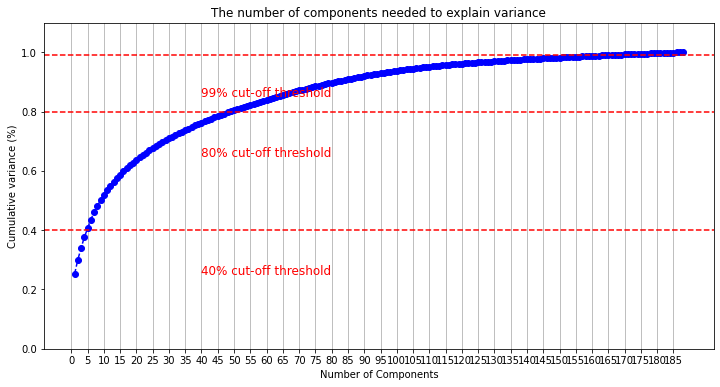

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 189, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 188, step=5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='--')
plt.text(40, 0.85, '99% cut-off threshold', color = 'red', fontsize=12)

plt.axhline(y=0.80, color='r', linestyle='--')
plt.text(40, 0.65, '80% cut-off threshold', color = 'red', fontsize=12)

plt.axhline(y=0.40, color='r', linestyle='--')
plt.text(40, 0.25, '40% cut-off threshold', color = 'red', fontsize=12)


ax.grid(axis='x')
plt.show()

In [ ]:
pca = PCA(n_components=0.80)
projected = pca.fit_transform(dataT.iloc[:, 1:])
print(X.shape)
print(projected.shape)
print(pca.explained_variance_ratio_)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


(188, 10184)
(188, 49)
[0.25084617 0.04904815 0.03888585 0.03707155 0.02993505 0.02975318
 0.02440348 0.02111271 0.01988665 0.01731544 0.01634675 0.01474265
 0.01382949 0.01255932 0.01196708 0.01099581 0.01024826 0.00951907
 0.00911406 0.00904613 0.00872963 0.00818236 0.00809189 0.0076612
 0.00751047 0.00717204 0.00670068 0.00652183 0.00625878 0.00599248
 0.0059267  0.00579597 0.00560718 0.00543905 0.00540737 0.00529923
 0.00522741 0.00503069 0.00479765 0.00467975 0.00465202 0.00458522
 0.0044808  0.00431889 0.00427722 0.00415709 0.00412237 0.00401554
 0.00397644]


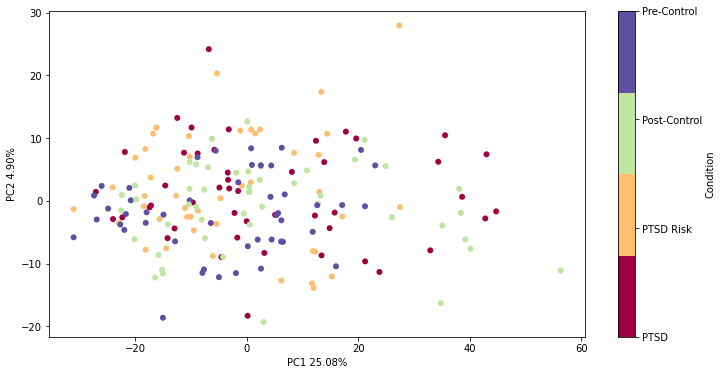

In [ ]:
import matplotlib.cm as cm
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(classes)
y_encod = le.transform(y)
#display(classes, "Encoded as", le.transform(classes))

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_encod, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 4))
plt.xlabel('PC1 {:0.2f}%'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 {:0.2f}%'.format(pca.explained_variance_ratio_[1]*100))
#plt.colorbar();
cb = plt.colorbar(ticks=range(4), label='Condition')
cb.ax.set_yticklabels(classes)
plt.show()


In [ ]:
# Import train_test_split and create test and train datasets 
from sklearn.model_selection import train_test_split 
import collections
# Here test set will be 40% of all data 
# Data not scaled since Random Forest can work with unscaled data also
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=15, stratify=y) 
display("Train data", collections.Counter(y_train))
display("Test data", collections.Counter(y_test))

'Train data'

Counter({'Post-Control': 28, 'PTSD': 28, 'Pre-Control': 28, 'PTSD Risk': 28})

'Test data'

Counter({'Pre-Control': 19, 'PTSD': 19, 'PTSD Risk': 19, 'Post-Control': 19})

In [ ]:
display(X_train.shape)
display(X_test.shape)

In [ ]:
# USING FUNCTIONAL API MODEL
ncol = X_train.shape[1]
input_dim = Input(shape = (ncol, ))

encoding_dim = 50 #this can be changed if you want to create more features

# Encoder Layers
encoded = Dense(500, activation = 'relu')(input_dim)
encoded = Dropout(0.5)(encoded) #DROUPOUT
encoded = Dense(100, activation = 'relu')(encoded)
encoded = Dense(encoding_dim, activation = 'relu')(encoded) # BOTTLENECK LAYER

# Decoder Layers
decoded = Dense(100, activation = 'relu')(encoded)
decoded = Dense(500, activation = 'relu')(decoded)
decoded = Dense(ncol, activation = 'sigmoid')(decoded)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded)

In [ ]:
# Compile the Model
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['mae'])
autoencoder.fit(X_train, X_train, epochs = 50,verbose=1, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))
encoder = Model(inputs = input_dim, outputs = encoded) #ASSIGN BOTTLENECK LAYER DATA AS OUTPUT
encoded_input = Input(shape = (encoding_dim, ))

Epoch 1/50
4/4 [==============================] - 2s 230ms/step - loss: 0.6909 - mae: 0.1606 - val_loss: 0.6759 - val_mae: 0.1418
Epoch 2/50
4/4 [==============================] - 0s 128ms/step - loss: 0.6751 - mae: 0.1396 - val_loss: 0.6693 - val_mae: 0.1338
Epoch 3/50
4/4 [==============================] - 0s 130ms/step - loss: 0.6701 - mae: 0.1333 - val_loss: 0.6648 - val_mae: 0.1274
Epoch 4/50
4/4 [==============================] - 1s 130ms/step - loss: 0.6670 - mae: 0.1290 - val_loss: 0.6610 - val_mae: 0.1215
Epoch 5/50
4/4 [==============================] - 1s 134ms/step - loss: 0.6652 - mae: 0.1271 - val_loss: 0.6611 - val_mae: 0.1217
Epoch 6/50
4/4 [==============================] - 0s 125ms/step - loss: 0.6644 - mae: 0.1257 - val_loss: 0.6603 - val_mae: 0.1224
Epoch 7/50
4/4 [==============================] - 0s 127ms/step - loss: 0.6610 - mae: 0.1218 - val_loss: 0.6546 - val_mae: 0.1139
Epoch 8/50
4/4 [==============================] - 1s 132ms/step - loss: 0.6592 - mae: 0.11

In [ ]:
#print(history.history.keys())
# summarize history for accuracy
plt.plot(autoencoder.history.history['mae'])
plt.plot(autoencoder.history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch cycles')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Loss and PLOT
loss = autoencoder.history.history['loss']
test_loss = autoencoder.history.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch cycles')

In [ ]:
# Prediction
encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')

encoded_train['id'] = y_train
encoded_train = encoded_train.set_index('id')

encoded_test['id'] = y_test
encoded_test = encoded_test.set_index('id')

X_encoded = pd.concat([encoded_train,encoded_test])
X_encoded.head()

In [ ]:
pca = PCA(n_components=0.80)
projected = pca.fit_transform(X_encoded.iloc[:, 1:])
print(X_encoded.shape)
print(projected.shape)
print(pca.explained_variance_ratio_)

In [ ]:
y = list(X_encoded.index)
le = preprocessing.LabelEncoder()
le.fit(classes)
y_encod = le.transform(y)

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_encod, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 4))
plt.xlabel('PC1 {:0.2f}%'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 {:0.2f}%'.format(pca.explained_variance_ratio_[1]*100))
#plt.colorbar();
cb = plt.colorbar(ticks=range(4), label='Condition')
cb.ax.set_yticklabels(classes)
plt.show()

#Link to Figures & Tables

https://docs.google.com/presentation/d/17wRl6E00zCat-tpy2w1lTR_E0P8iZyi3eb42-KRrgfc/edit?usp=sharing

#Discussion


Interestingly the top three features identified by the Logistic Regression (DSP, GSTM1, ALAS5) are all involved in either neurogenesis or inflammation. Desmoplakin (DSP) was found to be an essential downstream effector of Bcl11b, which is involved in granule cell differentiation (important for spatial learning and memory) and postnatal neurogenesis (Simon et al., 2012). Simon et al. found that the re-expression of DSP in Bcl11b mutants rescued neurogenesis, suggesting that DSP is essential in hippocampal development (2012). This is interesting as patients with PTSD have been observed to have smaller hippocampus (Logue et al., 2017). When comparing the PTSD patient gene expression to the controls, post-deployment DSP was found to have a fold change of -8.636413, although the p-value wasn’t significant at 0.146633. GSTM1 has been found to be a blood biomarker for the diagnosis of PTSD as well as a predictor prior to deployment of veterans in a 2015 study by Tylee et al.. The enzymes of the GSTM1 family are involved in detoxifying electrophilic compounds that are the products of oxidative stress which have been shown to be downregulated in PTSD cases with symptoms (Tylee et al., 2015). Other studies have also found GSTM1 polymorphisms to be associated with schizophrenia, bipolar disorder, and alcohol withdrawal symptoms (Tylee et al., 2015). ALAS2 also protects against oxidative stress, which supports previous articles that show the correlation between inflammation and PTSD, as oxidative stress can cause chronic inflammation (Sun et al., 2018; Hiroaki & Yoshiharu, 2019).

Out of all of the top genes identified in this dataset to be differentially expressed in PTSD patients versus controls, (in both pre-and post-deployment samples), KARS (kainate receptor) was the only one with a drug, imatinib)that directly targeted it (Sadegh et al., 2022; Shannon et al., 2003). Based on the results, DARS was found to have a fold change greater than one showing that the gene was upregulated in PTSD-risk and PTSD patients compared to controls. KARS was found to be involved in abnormal GABAergic neurotransmission in schizophrenia and bipolar disorder in rat models (Gisabella et al., 2012). As a result, memory and the ability to learn were affected as they are facilitated by the glutamatergic afferents in the hippocampus affecting the overall hippocampus development (Gisabella et al., 2012). The excessive activation of KARS can also cause brain ischemia as it is involved in the phosphorylation of the tyrosine in GluK2, playing a role in downstream pro-apoptosis signaling, which could be the result of traumatic events that occur in combat(Zhu et al., 2014). It has also been shown that postsynaptic kainate receptor overactivation can lead to neurological disorders (Zhu et al., 2014). This overactivation results from phosphorylation activation of the receptor, although the extent of this regulation should also be further studied (Zhu et al., 2014). Even though KARS has been connected to PTSD in other papers, identifying imatinib as a possible treatment for PTSD has yet to be discussed. Imatinib is used to treat leukemia as it inhibits the Abelson tyrosine kinase that is expressed in BCR-ABL in chronic myeloid leukemia (Cohen et al., 2021). However, if the cause of the neurological disorders is due to the overactivation of kainate receptors, the use of imatinib to inhibit the downstream phosphorylation-activation of these receptors may be able to mediate the downstream effects that lead to brain damage or other neurological disorders. More research also needs to be conducted to study the role of KARS in PTSD to treat patients using this gene as a target properly.

Another connection found in the PTSD patient samples versus the control was the link between NOTCH4 and MBD5, as they both are involved in bipolar disorder. NOTCH4 is present within tissues throughout the central nervous system, plays a key role in cell survival, and is important in neural cell proliferation, differentiation, and growth (Xie et al., 2020). It has been shown to be upregulated in those with bipolar disorder as well as schizophrenia. This is consistent with findings as NOTCH4 is upregulated in the PTSD risk and PTSD samples compared to the controls. MBD5 has also been associated with neurodevelopmental disorders such as ASD, epilepsy, and schizophrenia, with deficiencies in this gene resulting in impaired learning and abnormal social behaviors (Mullegama et al., 2021). This connection should be further studied as a common pathway between these two genes could be found to learn more about the mechanisms that drive pathophysiologies of neurological disorders in order to find therapeutic treatments. As shown by Figure 8, there currently aren't any drugs available that target these NOTCH4 or MBD5 or any of their upstream genes. Breen et al.'s paper didn't identify these genes as they analyzed the dataset using set modules with genes only involved in innate immune response, interferon signaling, hemostasis, and wound responsiveness (2015). Lastly, the analysis of the three known blood-brain barrier integrity biomarkers (NSE, GFAP, and S100ꞵ) didn't find that these markers were significantly different in the control versus the PTSD patients in the pre and post-deployment samples.

#Conclusion

In conclusion, despite the PCA not showing specific groupings even after using deep learning and classification to generate the PCA, the top three significant features used to make the model were involved in neurological disorders or inflammation, which has been previously linked to PTSD. This shows that the model used was finding genes that were relevant to PTSD, however, since there weren't any clear groupings, more data or better data preparation may be needed to identify further gene expression patterns that are unique to each of the four groups in this analysis. Also, seeing that NOTCH4 and MBD5 were linked through bipolar disorder, it would be interesting to identify if they are involved in a common pathway to see if they are genes that could be targeted to regulate PTSD symptoms. However, it seems as though more research needs to be conducted to elucidate the exact mechanisms by which these two genes function in the body. The only top significant gene that was differentially expressed in both the PTSD risk and PTSD patients that were found to have a drug that targeted it was KARS. Since this gene is significantly different in both the PTSD risk and PTSD patients, it might be a gene that increases the susceptibility of patients developing schizophrenia when abnormally expressed along with CMPK2, NOTCH4, TMEM45B, C2, SIGLEC1, RSAD2, CLEC12B, IFI44L, MS4A4A, and LILRA4. In order to determine if imatinib is a good drug to target the increased KARS expression in PTSD patients in order to mediate their symptoms, more research needs to be done to determine if inhibiting Abelson tyrosine kinase will decrease the phosphorylation of KARS in order to reduce its overexpression and decrease the downstream apoptotic signaling that occurs in the brain resulting in neurological disorders. Once this is determined, re-purposing imatinib may be an option for PTSD patients. Lastly, none of the blood-brain barrier impairment markers were found to be significant, showing that the cause of PTSD in these Marines may not have been due to the impairment of their brain barriers. However, this could also be due to the fact that the blood samples weren't taken directly after they returned from the combat zone but three months post-deployment. This could be due to the type of trauma that the Marines faced in combat, showing that their conditions weren't due to the impairment of the blood-brain barrier.

Some limitations of this study would include no FDR statistical analysis and the use of a low fold-change (FC>1) to identify significant genes as standard practice usually sets the fold-change to a minimum of 1.5 with a very significant difference in gene expression being greater than 2. Also, the PCA made using logistic regression only had a model accuracy of 0.39473684210526316 at the optimized test size of 40%. The deep learning PCA had a greater explained variance and an MAE of about 0.11, however, there were still no visible groupings based on the labeled samples. With this said, it would be better to explore the different principal components to see if another selection would have provided better groupings of the conditions, as 50 components is the optimal number for the dataset. Three principal components could be chosen to improve the visualization of the dataset in an interactive 3D plot. Lastly, another dataset could have also been used to supplement this one in order to improve the statistical analysis and derive genes that PTSD patients have in common. From here, networks could be created to see which systems the genes are most involved in to understand neurological disorders further and determine if any drugs can be repurposed to treat patients. Based on the PTSD risk samples, a list of genes that, when abnormally expressed, predisposes people to PTSD could also be compiled to provide more resources to Marines or military personnel that had those gene signatures post-deployment. Also, an analysis to compare the PTSD risk versus the PTSD groups should be conducted to determine if there were any genes that were expressed differently after their exposure to combat that resulted in their PTSD. Lastly, the pre-deployment and post-deployment groups should also be compared to control for any differential gene expression that could be due to the exposure to trauma but didn't result in PTSD. From here, the dataset could be further processed to reduce this potential noise in the dataset.


#Acknowledgments

I would like to thank Professor Elia Brodsky and OmcisLogic for the opportunity to learn Python and machine learning as I came into Georgetown University's M.S. in Systems Medicine program without any coding experience and wanting to learn how to analyze patient datasets to recognize gene patterns for possible therapeutic treatments. I would also like to thank Dr. Sona Vasudevan and Georgetown University for the opportunity to be a part of the M.S. in Systems Medicine program and for teaching me the tools needed to take the output of my machine learning analysis (significant genes) to make gene networks and identify possible drugs that target these genes. 

#References

Bam, M., Yang, X., Zumbrun, E. E., Ginsberg, J. P., Leyden, Q., Zhang, J., Nagarkatti, P. S., & Nagarkatti, M. (2017). Decreased AGO2 and DCR1 in pbmcs from war veterans with PTSD leads to diminished MIRNA resulting in elevated inflammation. Translational Psychiatry, 7(8). https://doi.org/10.1038/tp.2017.185

Cohen, P., Cross, D., & Jänne, P. A. (2021). Kinase drug discovery 20 years after Imatinib: Progress and future directions. Nature Reviews Drug Discovery, 20(7), 551–569. https://doi.org/10.1038/s41573-021-00195-4

Gisabella, B., Bolshakov, V. Y., & Benes, F. M. (2012). Kainate receptor-mediated modulation of hippocampal fast spiking interneurons in a rat model of schizophrenia. PLoS ONE, 7(3). https://doi.org/10.1371/journal.pone.0032483

Hori, H., & Kim, Y. (2019). Inflammation and post‐traumatic stress disorder. Psychiatry and Clinical Neurosciences, 73(4), 143–153. https://doi.org/10.1111/pcn.12820

Lin, S.-J., Vona, B., Barbalho, P. G., Kaiyrzhanov, R., Maroofian, R., Petree, C., Severino, M., Stanley, V., Varshney, P., Bahena, P., Alzahrani, F., Alhashem, A., Pagnamenta, A. T., Aubertin, G., Estrada-Veras, J. I., Hernández, H. A., Mazaheri, N., Oza, A., Thies, J., … Varshney, G. K. (2021). Biallelic variants in KARS1 are associated with neurodevelopmental disorders and hearing loss recapitulated by the knockout zebrafish. Genetics in Medicine, 23(10), 1933–1943. https://doi.org/10.1038/s41436-021-01239-1

Logue, M. W., van Rooij, S. J. H., Dennis, E. L., Davis, S. L., Hayes, J. P., Stevens, J. S., Densmore, M., Haswell, C. C., Ipser, J., Koch, S. B. J., Korgaonkar, M., Lebois, L. A. M., Peverill, M., Baker, J. T., Boedhoe, P. S. W., Frijling, J. L., Gruber, S. A., Harpaz-Rotem, I., Jahanshad, N., … Morey, R. A. (2018). Smaller hippocampal volume in Posttraumatic Stress Disorder: A multisite Enigma-PGC study: Subcortical volumetry results from Posttraumatic Stress Disorder Consortia. Biological Psychiatry, 83(3), 244–253. https://doi.org/10.1016/j.biopsych.2017.09.006

Sadegh, S., Skelton, J., Anastasi, E., Blumenthal, D. B., Maier, A., Galindez, G., Nogales, C., Casas, A. I., Schmidt, H. H., Wipat, A., Kacprowski, T., & Baumbach, J. (2022). NeDRex - an integrative and Interactive Network Medicine Platform for drug repurposing. NeDRex - an Integrative and Interactive Network Medicine Platform for Drug Repurposing. https://doi.org/10.14293/s2199-1006.1.sor-.pppy90r8.v1

Sun, J., Pan, X., Christiansen, L. I., Yuan, X.-L., Skovgaard, K., Chatterton, D. E., Kaalund, S. S., Gao, F., Sangild, P. T., & Pankratova, S. (2018). Necrotizing enterocolitis is associated with acute brain responses in preterm pigs. Journal of Neuroinflammation, 15(1). https://doi.org/10.1186/s12974-018-1201-x

Young, H. J., Lee, J. W., & Kim, S. (2016). Function of membranous lysyl-trna synthetase and its implication for tumorigenesis. Biochimica Et Biophysica Acta (BBA) - Proteins and Proteomics, 1864(12), 1707–1713. https://doi.org/10.1016/j.bbapap.2016.09.009 

#Supplementary


##Classification

In [ ]:
#@title Prepare Packages and Data {run: "auto"}
#@markdown Here we will use a dataset from cancer patients with Hepatocellular Carcinoma: `The Cancer Genome Atlas`, (see [TCGA](https://portal.gdc.cancer.gov/)). <br>
#@markdown ![The Cancer Genome Atlas](https://docs.gdc.cancer.gov/Data_Portal/Users_Guide/images/GDC-Home-Page.png "TCGA") <br>
#@markdown To learn more, visit [OmicsLogic](https://learn.omicslogic.com/) <br>

#import pandas and numpy
import pandas as pd
import numpy as np

#import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

# initially SVM is a binary (two classes) classifier
# so by default multiclass problems are handled according to a "one-vs-one" scheme.
# if you want to try OneVsRest scheme - you can use OneVsRestClassifier from sklearn as a wrapper around SVC.
# import model class (SVC stands for Support Vector Classification)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
import warnings

#import tools for ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#visualization
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = 'ggplot2'
test_size = 0.3

data = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1).xlsx', header=[0]) 


In [ ]:
data

In [ ]:
#prepare data
features = data.iloc[1:, 0].values
data=data.drop(['GeneSymbols'], axis = 1) 
dataT = np.transpose(data)

#X is the data, y is the lables (classes)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

##SVM: Linear SVC
Classification with Support Vector Machine (linear SVC)

In [ ]:
#@markdown Support Vector Machine: sklearn.svm.SVC (C-Support Vector Classification)
#@markdown 
#@markdown Here we will use a dataset from cancer patients with Hepatocellular Carcinoma:
#@markdown 
#@markdown `The Cancer Genome Atlas`, (see [TCGA](https://portal.gdc.cancer.gov/)).
#@markdown ![Support Vector Machine](https://miro.medium.com/max/500/0*DJ_mGzidt4WqWoVm "SVM GIF")


warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# there are several useful parameters such as:
# C - Regularization parameter. The strength of the regularization.
# kernel - Specifies the kernel type to be used in the algorithm
# we will use a linear kernel, it is the only kernel which allows us to use features selection
model = LinearSVC(C=1.0)
model.fit(X_train, y_train)

# after training we can predict labels for the test samples
predictions = model.predict(X_test)

c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

## Classification Report
Classification Results

In [ ]:
#@markdown Training Results {run: "auto"} </br>
#@markdown Learn more about each one of these terms here, [OmicsLogic](https:learn.omicslogic.com)).
#@markdown ![Annotation](https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png "Annotation")


clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

#Run Principal Component Analysis
n_components=4
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

###Confusion Matrix

In [ ]:
CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

heat = go.Heatmap(z = CM_df, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

###ROC Curve

In [ ]:
##ROC Curve
# to make roc curve we should binarize our class labels to “one hot” vectors, so each class represent binary vector
# for example: first class = [1, 0, 0, 0], second = [0, 1, 0, 0], ...
y_test_bin_labels = label_binarize(y_test, classes=classes)

# for roc curve we are using predicted proba for our test samples
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_onehot = pd.get_dummies(y, columns=model.classes_)

#plot
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_score.shape[1]):
    y_true = y_onehot.iloc[:, i]
    name = f"{y_onehot.columns[i]}"
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700, height=500,
    template = template,
    title="ROC Curve"
)
fig.show()

###Feature Significance

In [ ]:
# the weights obtained from svm.coef_ represent the vector coordinates
# which are orthogonal to the hyperplane and their direction indicates the predicted class.
# this is only available in the case of a linear kernel
top_features_count = 20

# we use median of weights from all classes, you can also use np.sum(np.abs(model.coef_, axis=0))
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]

d = {'Features':features[top_coefficients], 'Weight':vector_weights[top_coefficients]}
df_features = pd.DataFrame(d)

#plot feature significance
fig = px.bar(y=df_features.Features, x=df_features.Weight, template=template)
fig.update_layout(width=700, height=1000, template=template, title="Feature Significance")
fig.show()

##MDS, NMDS, PCA

In [ ]:
df = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1).xlsx', header=[0]) 

In [ ]:
#set labels
labels_list = df.loc[[0]] 

#Make a list of sample names
sample_names = df.loc[0] 
sample_names = list(df)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Condition')) 

#Remove row "Group" at index 0 from data
data=df.drop([0]) 

#Remove id from axis
data=data.drop(['GeneSymbols'], axis=1) 
data = data.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

In [ ]:
labels

array(['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control'], dtype=object)

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold

scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

#import libraries for ploting and scaling
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

#MDS
mds = MDS(2,random_state=0)
XMDS = mds.fit_transform(scaled_data)

#NMDS
nmds = manifold.MDS(n_components=2, random_state=0, metric=False, max_iter=3000)
XNMDS = nmds.fit_transform(scaled_data)

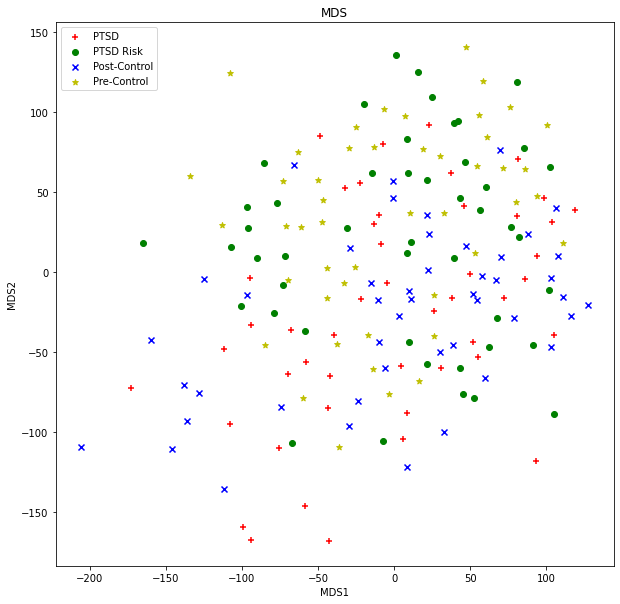

In [ ]:
# plot MDS

MDS1 = 0 
MDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XMDS.shape[0]): 
  if flabels[i] == 'PTSD': 
    c1 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='r', marker='+') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'PTSD Risk': 
    c2 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='g', marker='o') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'Post-Control': 
    c3 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='b', marker='x') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'Pre-Control': 
    c4 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='y', marker='*') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 

#Add labels to MDS scatterplot:
plt.legend([c1, c2, c3, c4],['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control']) 

plt.xlabel('MDS1') 
plt.ylabel('MDS2') 
plt.title('MDS')
plt.show() 

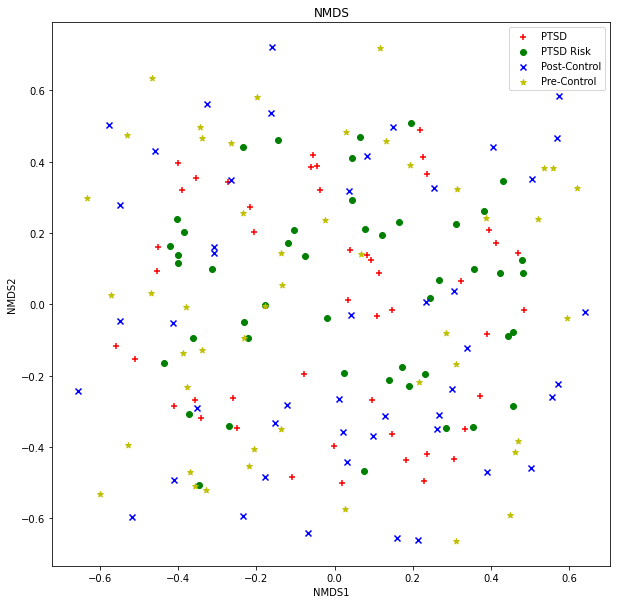

In [ ]:
#NMDS
NMDS1 = 0 
NMDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XNMDS.shape[0]): 
  if flabels[i] == 'PTSD': 
    c1 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='r', marker='+') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'PTSD Risk': 
    c2 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='g', marker='o') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'Post-Control': 
    c3 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='b', marker='x') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'Pre-Control': 
    c4 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='y', marker='*') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control']) 
plt.xlabel('NMDS1') 
plt.ylabel('NMDS2') 
plt.title('NMDS')
plt.show() 

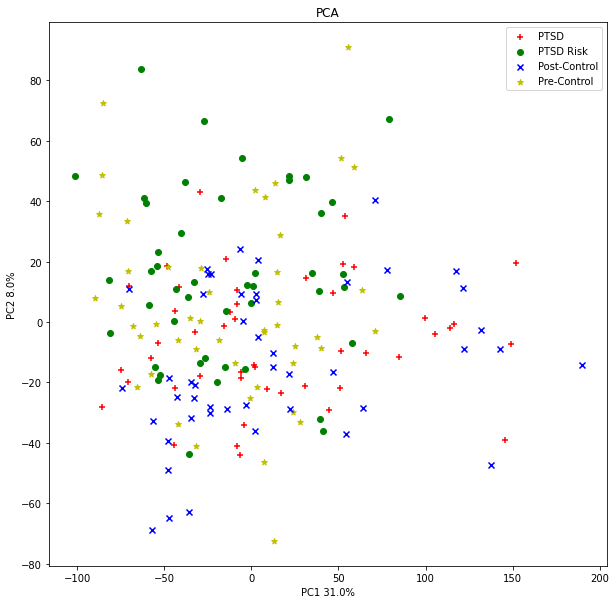

In [ ]:
#Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'PTSD': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'PTSD Risk': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Post-Control': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='x') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Pre-Control': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='y', marker='*') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('PCA')
plt.show() 

##Clustering- Kmeans Best Clustering

In [ ]:
#Get list of all labels
df_all = pd.read_excel('/content/PTSD Dataset Condition Annotated Words (1).xlsx', header=[0]) 

In [ ]:
labels_list = df_all.loc[[0]] 

#Make a list of sample names
sample_names = df_all.loc[0] 
sample_names = list(df_all)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Condition')) 

#Remove row "Group" at index 0 from data
data_all = df_all.drop([0]) 

#Remove id from axis
data_all = data_all.drop(['GeneSymbols'], axis=1) 
data_all = data_all.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

In [ ]:
df_all.shape

(10185, 189)

In [ ]:
# import SciKit clustering methods: K-means, hierarchical and Birch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

#data selection
data=data_all

# define and fit the model
kmeans_m = KMeans(n_clusters=5).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(data)
birch_m = Birch(n_clusters=5).fit(data)

In [ ]:
#comapre cluster labels for all methods
d = {'Samples':sample_names, 'Labels':flabels, 'Kmeans':kmeans_m.labels_, 'Hclust':hclust_m.labels_, 'Birch':birch_m.labels_}
df = pd.DataFrame(d)

print(df)

         Samples        Labels  Kmeans  Hclust  Birch
0     Sample_1_1     PTSD Risk       1       1      1
1     Sample_1_3          PTSD       4       1      1
2     Sample_2_1     PTSD Risk       2       2      2
3     Sample_2_3          PTSD       2       2      2
4     Sample_3_1     PTSD Risk       1       0      0
..           ...           ...     ...     ...    ...
183  Sample_92_3  Post-Control       2       2      2
184  Sample_93_1   Pre-Control       1       0      0
185  Sample_93_3  Post-Control       2       2      2
186  Sample_94_1   Pre-Control       4       1      1
187  Sample_94_3  Post-Control       4       1      1

[188 rows x 5 columns]


In [ ]:
#create cross tabulation for K-means
df1=pd.crosstab(df.Labels, df.Kmeans, margins=True)

In [ ]:
#create cross tabulation for Hierarchical
df2=pd.crosstab(df.Labels, df.Hclust, margins=True)

In [ ]:
df3=pd.crosstab(df.Labels, df.Birch, margins=True)

Text(0.5, 1.0, 'Birch Clustering Cluster Prediction')

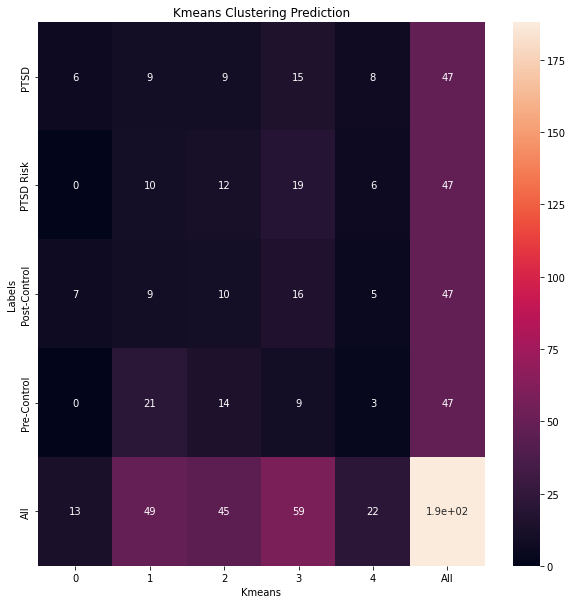

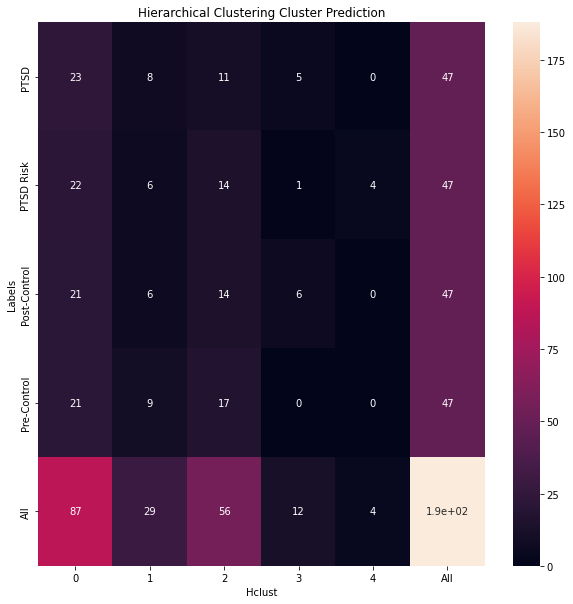

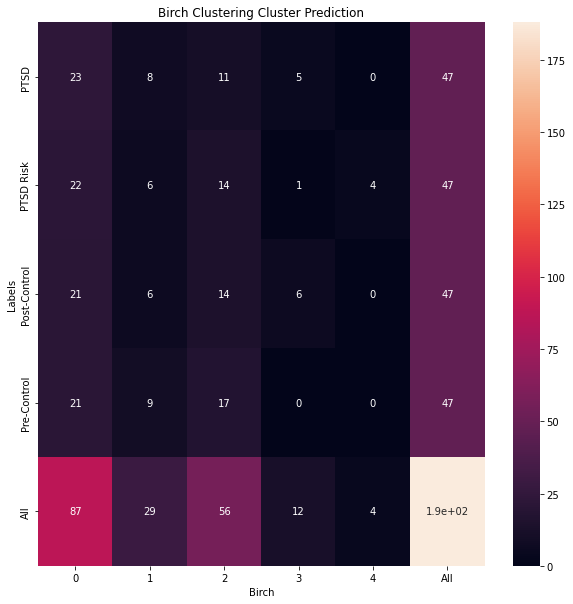

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df1, annot=True)
plt.title("Kmeans Clustering Prediction", fontsize =12)

plt.figure(figsize=(10, 10))
sns.heatmap(df2, annot=True)
plt.title("Hierarchical Clustering Cluster Prediction", fontsize =12)

plt.figure(figsize=(10, 10))
sns.heatmap(df3, annot=True)
plt.title("Birch Clustering Cluster Prediction", fontsize =12)

###K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

166587.12364358775


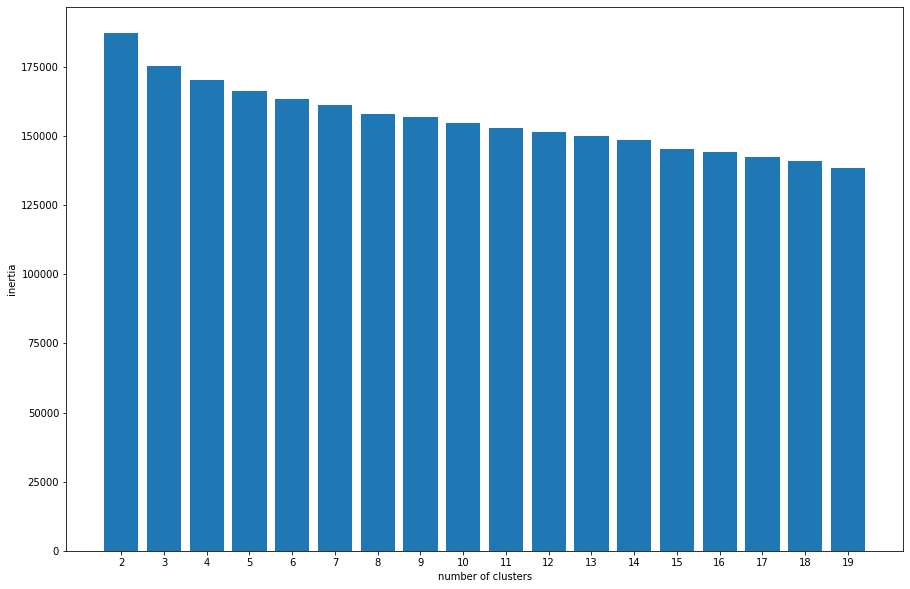

In [ ]:
#K-means evaluation inertia
print(kmeans_m.inertia_)

#check param
df1 = pd.DataFrame()

#create a dataframe with noise and number of components
for i in range (2,20):
  kmeans_m = KMeans(n_clusters=i).fit(data)
  df1 = df1.append({'clust':i,'inertia': kmeans_m.inertia_}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df1.clust, df1.inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(df1.clust), max(df1.clust)+1, 1.0));

###Silhouette Values
Hierarchial clustering has one high sihouette value and lots of lower averages showing that this clustering configuration is not appropriate as a high value for most clusters is ideal to show that the object is groups with similar objects compared to the objects in neighboring clusters. The Kmeans clustering is slightly better with high silhouette values when 2 and 3 clusters are used while hierarchial clustering only showed a high silhouette value when 2 clusters are used. The birch clustering method performed similarly to the hierarchial clustering showing the Kmeans is the best clustering method for this dataset out of the three methods tested. 

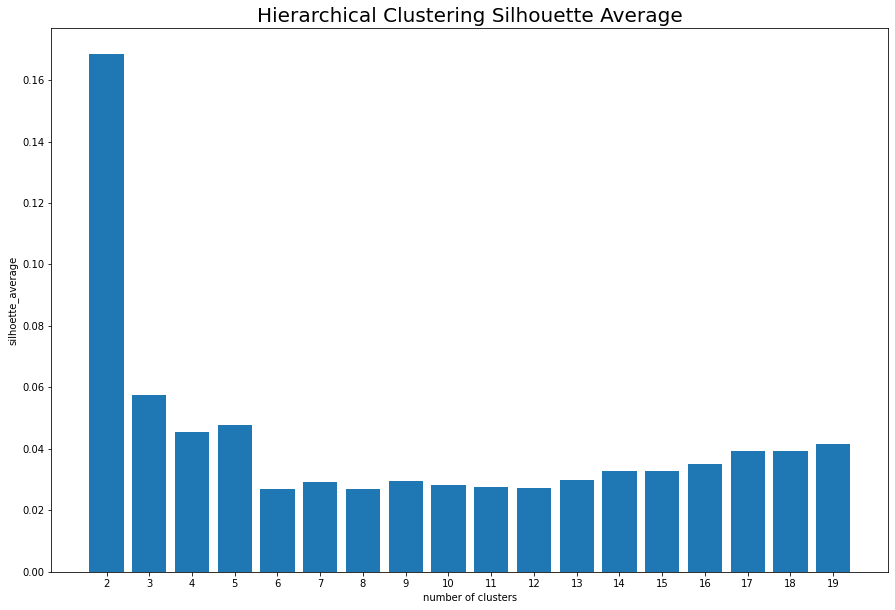

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

df_scores_hc = pd.DataFrame()

for i in range (2,20):
  hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=i).fit(data)
  cluster_labels = hclust_m.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  #print("For %s clusters" %(i), "the average silhouette_score is:", silhouette_avg)
  df_scores_hc = df_scores_hc.append({'clust':i,'silhouette_avg': silhouette_avg}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df_scores_hc.clust, df_scores_hc.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Hierarchical Clustering Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

For 2.0 clusters the average silhouette_score is: 0.1596119786506315


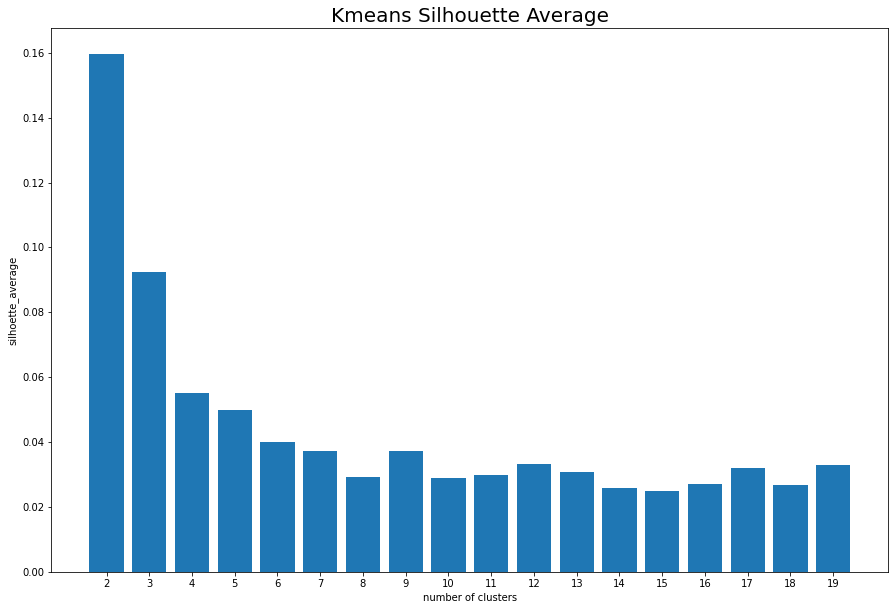

In [ ]:
#prepare a dataframe for cluster silhouette values
df_scores_kmeans = pd.DataFrame()

for i in range (2,20):
  kmeans_m = KMeans(n_clusters=i).fit(data)
  cluster_labels = kmeans_m.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  df_scores_kmeans = df_scores_kmeans.append({'clust':i,'silhouette_avg': silhouette_avg}, ignore_index=True)


#find the top value of silhouette score and associated cluster number
max_sil_value = df_scores_kmeans.silhouette_avg.max()
max_sil_clust = df_scores_kmeans.iloc[df_scores_kmeans.silhouette_avg.argmax(), 0]
print("For %s clusters" %(max_sil_clust), "the average silhouette_score is:", max(df_scores_kmeans.silhouette_avg))

#plot barplot for data
plt.figure(figsize=(15, 10))
plt.bar(df_scores_kmeans.clust, df_scores_kmeans.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Kmeans Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

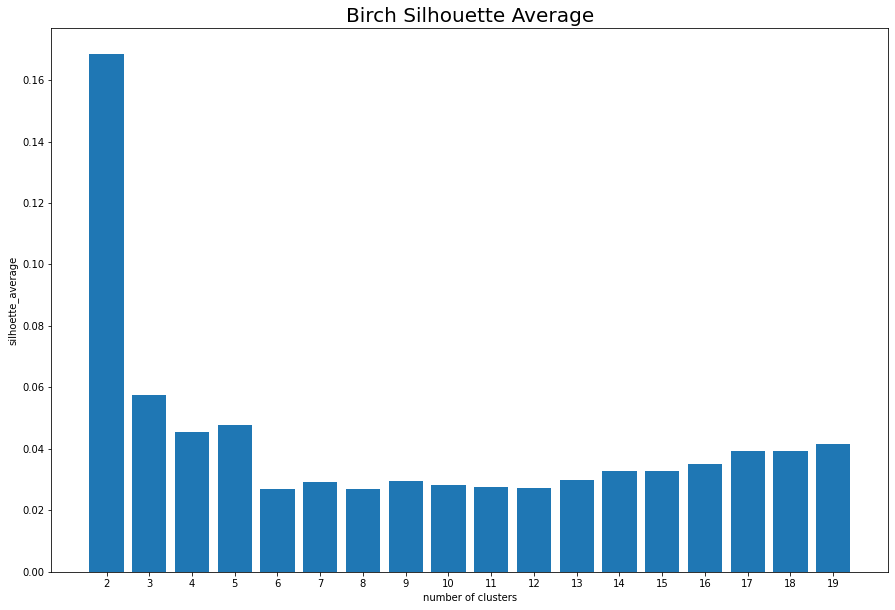

In [ ]:
df_scores_birch = pd.DataFrame()

for i in range (2,20):
  birch_m = Birch(n_clusters=i).fit(data)
  cluster_labels = birch_m.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  df_scores_birch = df_scores_birch.append({'clust':i,'silhouette_avg': 
                                            silhouette_avg}, ignore_index=True)
plt.figure(figsize=(15, 10))
plt.bar(df_scores_birch.clust, df_scores_birch.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Birch Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

Hierarchial clustering has one high sihouette value and lots of lower averages showing that this clustering configuration is not appropriate as a high value for most clusters is ideal to show that the object is groups with similar objects compared to the objects in neighboring clusters. The Kmeans clustering is slightly better with high silhouette values when 2 and 3 clusters are used while hierarchial clustering only showed a high silhouette value when 2 clusters are used. The birch clustering method performed similarly to the hierarchial clustering showing the Kmeans is the best clustering method for this dataset out of the three methods tested. 

###2-4 Clusters with Kmeans, Hclust, and Birch

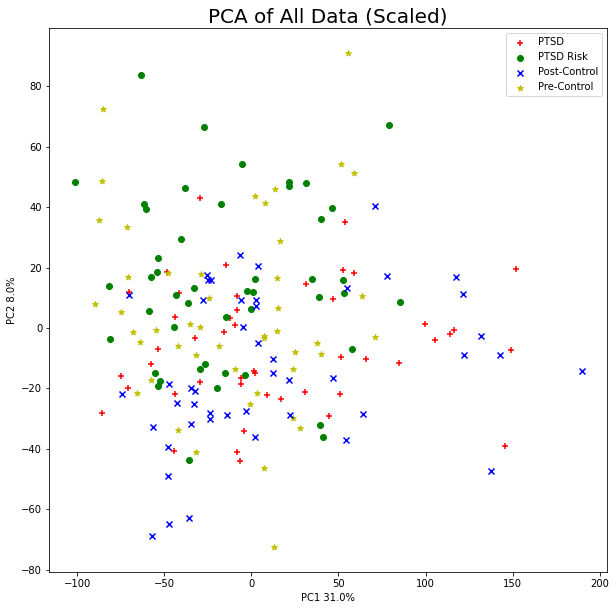

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

#Run Principal Component Analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'PTSD': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'PTSD Risk': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Post-Control': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='x') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Pre-Control': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='y', marker='*') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['PTSD', 'PTSD Risk', 'Post-Control', 'Pre-Control']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title("PCA of All Data (Scaled)", fontsize=20)
plt.show() 

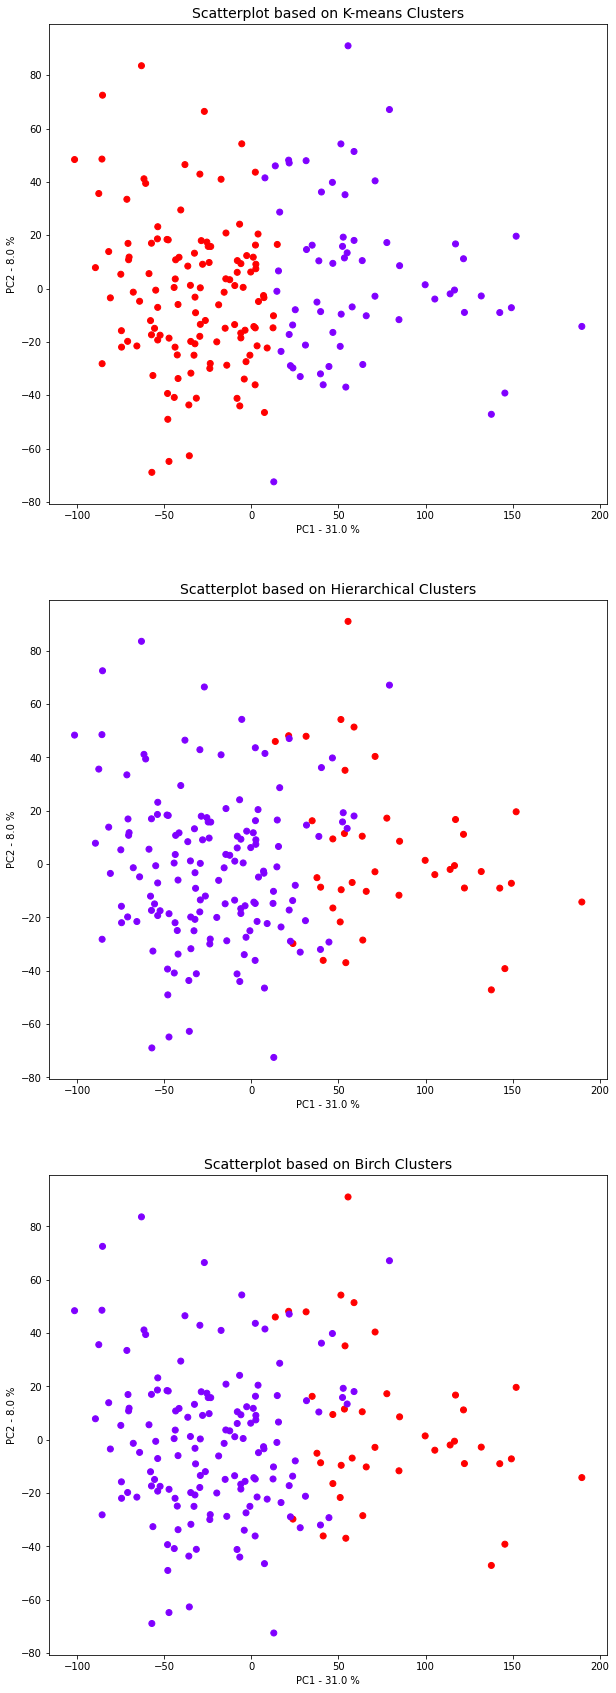

In [ ]:
# define and fit the model
n_clust = 2

kmeans_m = KMeans(n_clusters=n_clust).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=n_clust).fit(data)
birch_m = Birch(n_clusters=n_clust).fit(data)

fig, ax = plt.subplots(3, figsize=(10, 30))

#Plot scatterplot for K-means Clustering
ax[0].scatter(df_pca[0], df_pca[1], c = kmeans_m.labels_, cmap ='rainbow')
ax[0].set_title("Scatterplot based on K-means Clusters", fontsize=14)
ax[0].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[0].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Hierarchical Clustering
ax[1].scatter(df_pca[0], df_pca[1], c = hclust_m.labels_, cmap ='rainbow')
ax[1].set_title("Scatterplot based on Hierarchical Clusters", fontsize=14)
ax[1].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[1].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Birch Clustering
ax[2].scatter(df_pca[0], df_pca[1], c = birch_m.labels_, cmap ='rainbow')
ax[2].set_title("Scatterplot based on Birch Clusters", fontsize=14)
ax[2].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[2].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

plt.show()

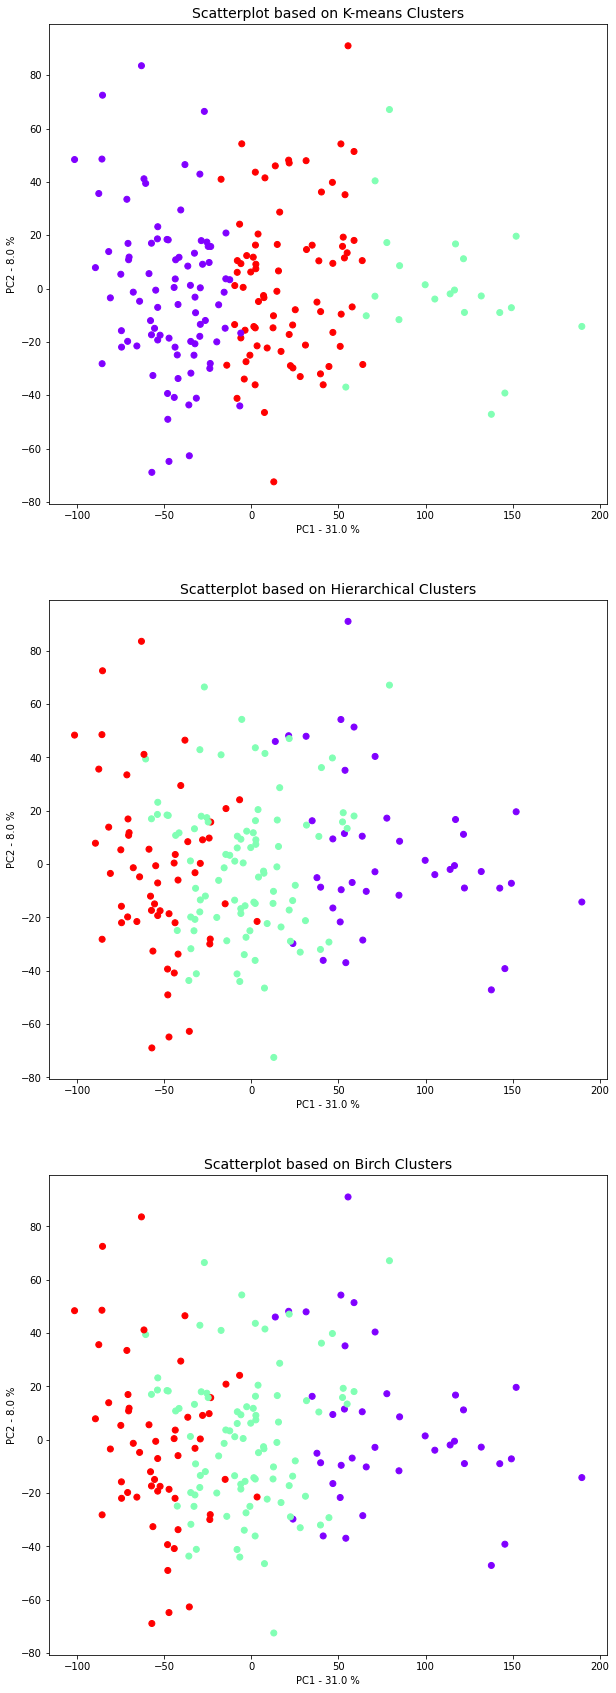

In [ ]:
# define and fit the model
n_clust = 3

kmeans_m = KMeans(n_clusters=n_clust).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=n_clust).fit(data)
birch_m = Birch(n_clusters=n_clust).fit(data)

fig, ax = plt.subplots(3, figsize=(10, 30))

#Plot scatterplot for K-means Clustering
ax[0].scatter(df_pca[0], df_pca[1], c = kmeans_m.labels_, cmap ='rainbow')
ax[0].set_title("Scatterplot based on K-means Clusters", fontsize=14)
ax[0].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[0].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Hierarchical Clustering
ax[1].scatter(df_pca[0], df_pca[1], c = hclust_m.labels_, cmap ='rainbow')
ax[1].set_title("Scatterplot based on Hierarchical Clusters", fontsize=14)
ax[1].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[1].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Birch Clustering
ax[2].scatter(df_pca[0], df_pca[1], c = birch_m.labels_, cmap ='rainbow')
ax[2].set_title("Scatterplot based on Birch Clusters", fontsize=14)
ax[2].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[2].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

plt.show()

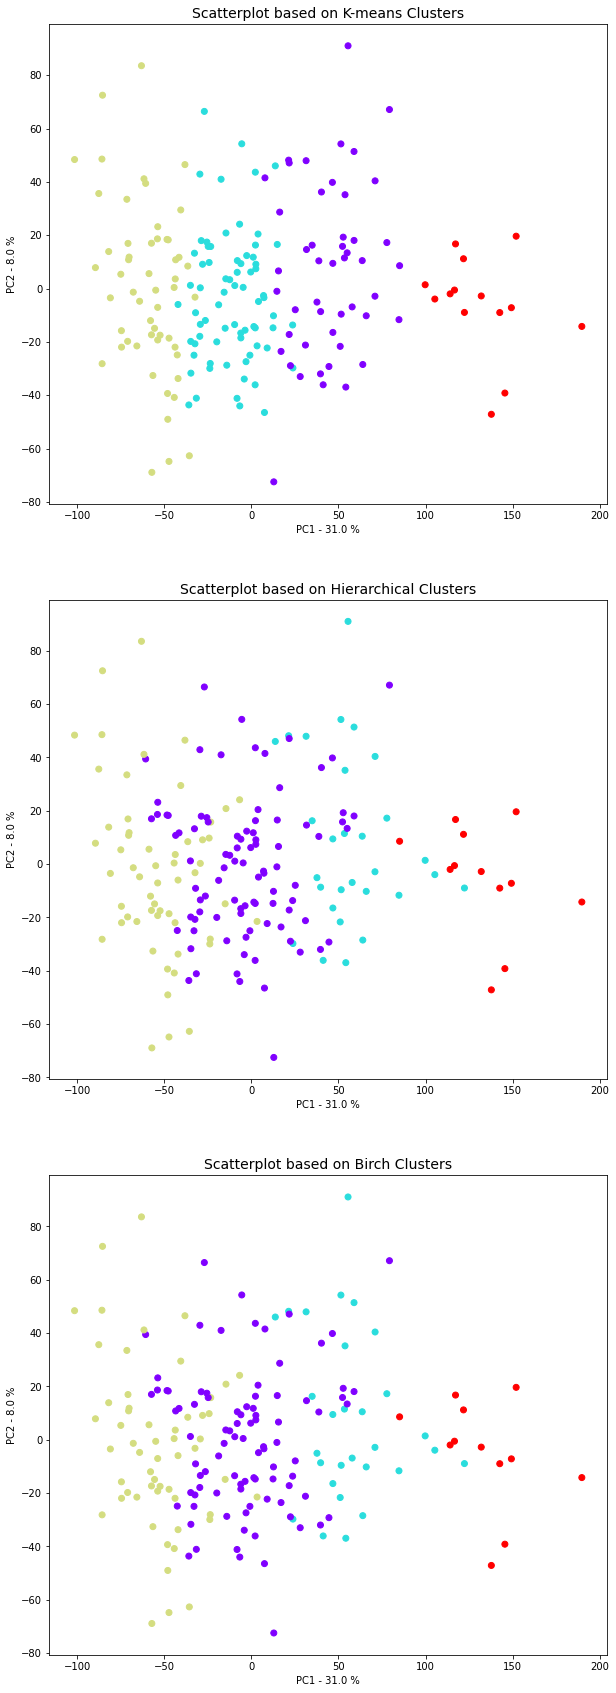

In [ ]:
# define and fit the model
n_clust = 4

kmeans_m = KMeans(n_clusters=n_clust).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=n_clust).fit(data)
birch_m = Birch(n_clusters=n_clust).fit(data)

fig, ax = plt.subplots(3, figsize=(10, 30))

#Plot scatterplot for K-means Clustering
ax[0].scatter(df_pca[0], df_pca[1], c = kmeans_m.labels_, cmap ='rainbow')
ax[0].set_title("Scatterplot based on K-means Clusters", fontsize=14)
ax[0].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[0].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Hierarchical Clustering
ax[1].scatter(df_pca[0], df_pca[1], c = hclust_m.labels_, cmap ='rainbow')
ax[1].set_title("Scatterplot based on Hierarchical Clusters", fontsize=14)
ax[1].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[1].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Birch Clustering
ax[2].scatter(df_pca[0], df_pca[1], c = birch_m.labels_, cmap ='rainbow')
ax[2].set_title("Scatterplot based on Birch Clusters", fontsize=14)
ax[2].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[2].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

plt.show()